### 1. Importing the libraries

In [1]:
# importing the libraries and warnings
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


### 2. Reading the Dataset

In [2]:
#reading the application data set in app
app = pd.read_csv(r"D:\Documents\Study Material\Python\Upgrad Projects\Credit EDA Case Study-20250206T160830Z-001\Credit EDA Case Study\application_data.csv",encoding = 'unicode_escape')
#reading the previous appication data in prev_app
prev_app = pd.read_csv(r"D:\Documents\Study Material\Python\Upgrad Projects\Credit EDA Case Study-20250206T160830Z-001\Credit EDA Case Study\previous_application.csv",encoding = 'unicode_escape')
#reading the data dictionary in col
col = pd.read_csv(r"D:\Documents\Study Material\Python\Upgrad Projects\Credit EDA Case Study-20250206T160830Z-001\Credit EDA Case Study\columns_description.csv",encoding = 'unicode_escape')

In [3]:
#starting with the current application 'app', reading the head of app
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

### 2.1 Examining the application data set


In [4]:
# Identifying the shape to check the count of rows and columns
app.shape

(307511, 122)

In [5]:
# Finding out the complete summary of the dataframe
app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
# Finding out the summary for numerical columns
app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

### 2.2 Data Cleaning


In [7]:
#Finding out the null values percentage per column in the application data set
missing_val_app_perc = round(100*(app.isnull().sum()/len(app.index)),2)

In [8]:
missing_val_app_perc.sort_values(ascending = False)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

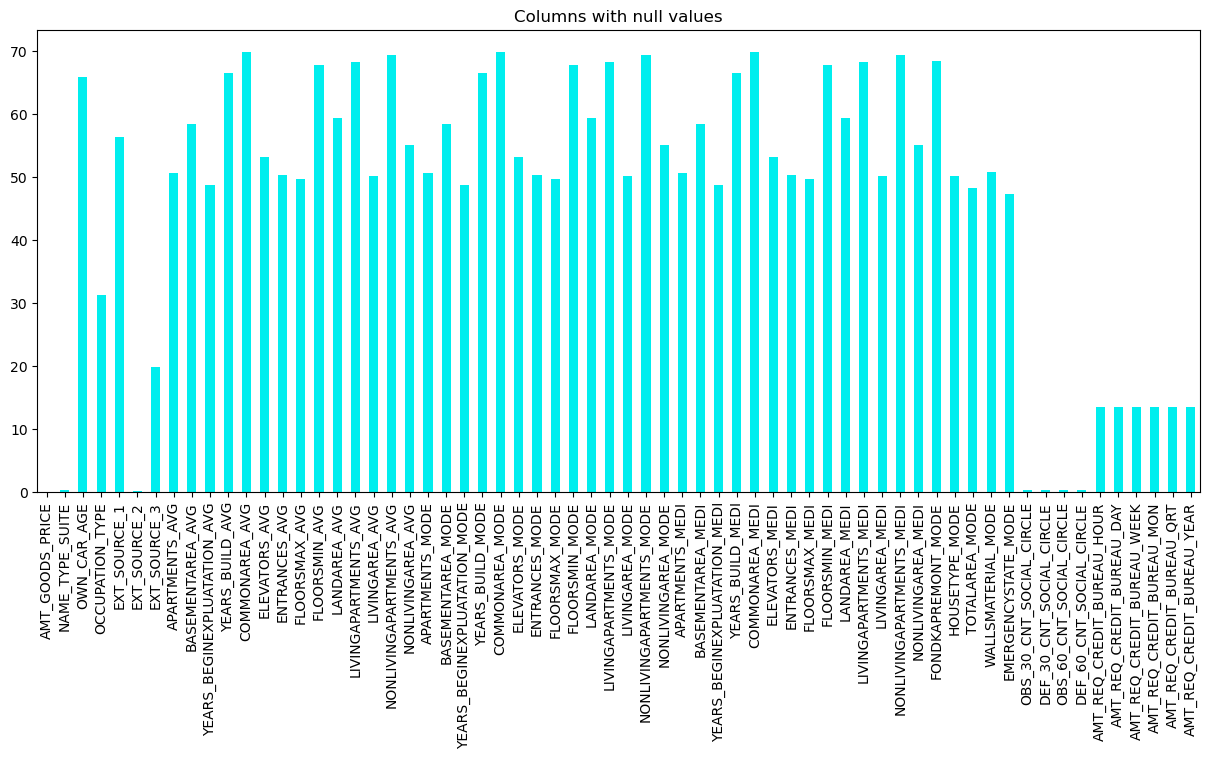

The number of columns having null values greater than 0% is 64


In [9]:
# Visualizing the columns having null values and finding the number of columns having null values
null_columns  = missing_val_app_perc[missing_val_app_perc>0]
null_columns.plot(kind = 'bar',figsize = [15,6],title = "Columns with null values", color = "#00EEEE")
plt.show()
print("The number of columns having null values greater than 0% is",len(null_columns))

#### Creating a function to remove null values for data cleaning

In [10]:
# Function to remove null values

def remove_null_val(dataset,percent):
    df = dataset.copy()
    null_col = list(missing_val_app_perc[missing_val_app_perc>=percent].index)
    df.drop(columns = null_col, inplace = True)
    print("The number of columns dropped is",len(null_col))
    print("The shape of the new dataset is",df.shape)
    return df


In [11]:
# Identifying the columns having null values equal or more than 35%
null_35 = missing_val_app_perc[missing_val_app_perc >= 35] 
print("The number of columns having null values greater than 35% is",len(null_35))

The number of columns having null values greater than 35% is 49


#### Step I - Fixing the missing values in columns by removing the columns with null values percentage greater than 35%, as dataset with more than 50% data missing will create bias and from the plot 'Columns with null values' , it can be infered that more than missing value percent greater than 35% is not majorly impacting the target variable

In [12]:
app = remove_null_val(app,35)

The number of columns dropped is 49
The shape of the new dataset is (307511, 73)


In [13]:
#finding the number of columns having null values in new dataset
missing_new_app = 100*(app.isnull().sum()/len(app.index))

In [14]:
print("The number of null columns in the new dataset is",len(missing_new_app[missing_new_app >0]))
print(missing_new_app[missing_new_app >0].sort_values(ascending = False))


The number of null columns in the new dataset is 18
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64


#### Step II - Imputing the missing values

In [15]:
# Finding the unique values of column occupation type to identify the value with which the missing values can be imputed, 
print(app['OCCUPATION_TYPE'].value_counts())
print(app['OCCUPATION_TYPE'].mode())


OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64
0    Laborers
Name: OCCUPATION_TYPE, dtype: object


In [16]:
#Imputing null values of occupation_type with column's mode i.e.Laborers since it is a categorical data 
app['OCCUPATION_TYPE'].fillna(value = "Laborers",inplace = True)

In [17]:
#Checking the null values after imputation
app['OCCUPATION_TYPE'].isnull().sum()

0

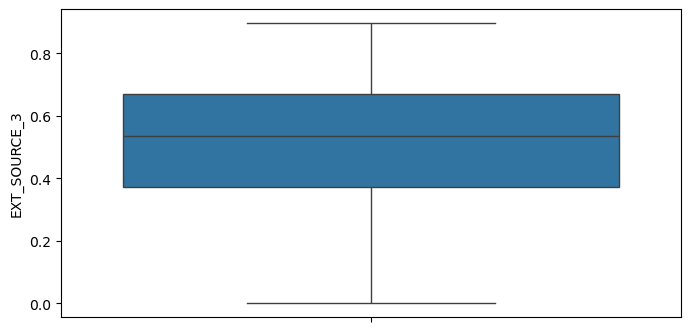

In [18]:
# plotting the column EXT_SOURCE_3 to identify the outlier and variable type to impute the missing values 
plt.figure(figsize = (8,4))
sns.boxplot(app['EXT_SOURCE_3'])
plt.show()

In [19]:
#Imputing null values of EXT_SCORE_3 column with mean since this column provides the data for normalized score from external data which is continous data and has no outliers
app['EXT_SOURCE_3'].mean()

0.5108529061799658

In [20]:
app['EXT_SOURCE_3'].fillna(value = app['EXT_SOURCE_3'].mean(), inplace = True )

In [21]:
#Checking the null values after missing values imputation
app['EXT_SOURCE_3'].isnull().sum()

0

In [22]:
#Identifying the data types present for suite type column in application data 
app['NAME_TYPE_SUITE'].head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [23]:
#Since the column Name Type Suite is categorical hence filling missing values with mode
app['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [24]:
app['NAME_TYPE_SUITE'].fillna(value = "Unaccompanied", inplace = True)

The columns AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_QRT are number of credit enquires so it can be replaced with the most occuring values

In [25]:
print(app['AMT_REQ_CREDIT_BUREAU_YEAR'].mode())


0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


In [26]:
print(app['AMT_REQ_CREDIT_BUREAU_MON'].mode())


0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


In [27]:
print(app['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())


0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


In [28]:
print(app['AMT_REQ_CREDIT_BUREAU_DAY'].mode())


0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


In [29]:
print(app['AMT_REQ_CREDIT_BUREAU_HOUR'].mode())


0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


In [30]:
print(app['AMT_REQ_CREDIT_BUREAU_QRT'].mode())

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


In [31]:
app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value = "0", inplace = True)
app['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value = "0", inplace = True)
app['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value = "0", inplace = True)
app['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value = "0", inplace = True)
app['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value = "0", inplace = True)
app['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value = "0", inplace = True)

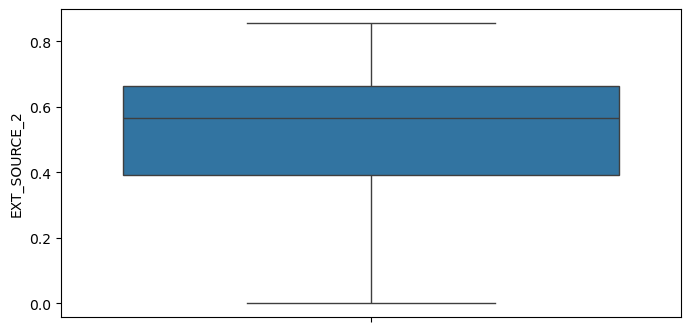

In [32]:
# plotting the column EXT_SOURCE_2 to identify the outlier and variable type to impute the missing values 
plt.figure(figsize = (8,4))
sns.boxplot(app['EXT_SOURCE_2'])
plt.show()

In [33]:
#Imputing null values of EXT_SCORE_2 column with mean since this column provides the data for normalized score from external data and are continous values and there are no outliers 
app['EXT_SOURCE_2'].mean()

0.5143926741308462

In [34]:
app['EXT_SOURCE_2'].fillna(value = app['EXT_SOURCE_2'].mean(), inplace = True )

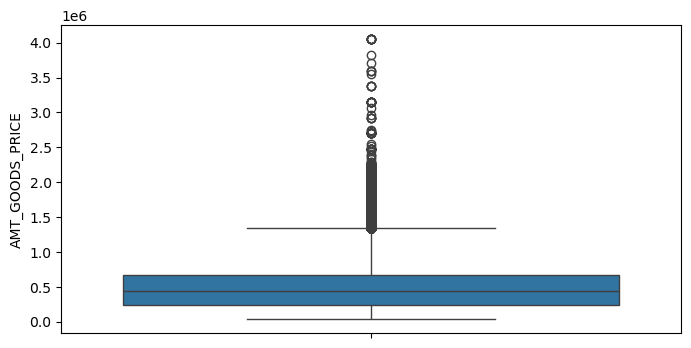

In [35]:
#Checking for the column amount goods price similarly by plotting the box plot to identify if any outliers present
plt.figure(figsize = (8,4))
sns.boxplot(app['AMT_GOODS_PRICE'])
plt.show()

In [36]:
#Since the variable is continous with outliers hence imputing with median
app['AMT_GOODS_PRICE'].median()

450000.0

In [37]:
app['AMT_GOODS_PRICE'].fillna(value = app['AMT_GOODS_PRICE'].median(), inplace = True)

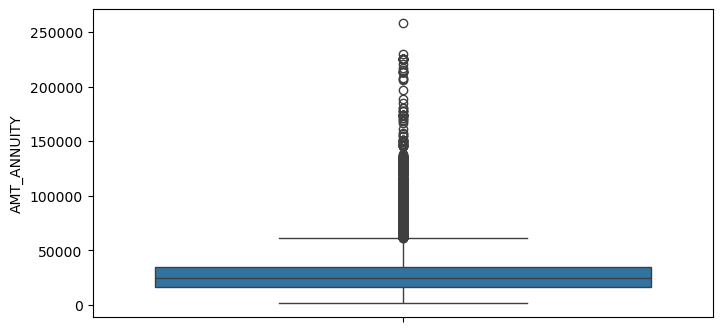

In [38]:
#Checking for the column amount annuity similarly by plotting the box plot
plt.figure(figsize = (8,4))
sns.boxplot(app['AMT_ANNUITY'])
plt.show()

In [39]:
#Since the variable is continous with outliers hence imputing with median
app['AMT_ANNUITY'].median()

24903.0

In [40]:
app['AMT_ANNUITY'].fillna(value = app['AMT_ANNUITY'].median(), inplace = True)

In [41]:
# The column CNT_FAM_MEMBERS shows the number of family members of client, it can be imputed with the column median
app['CNT_FAM_MEMBERS'].median()

2.0

In [42]:
app['CNT_FAM_MEMBERS'].fillna(value = app['CNT_FAM_MEMBERS'].median(), inplace = True)

The other columns with missing values don't impact the target variable directly and are having very less  percentage hence keeping that as it is without imputing

### 2.3 Analyzing Errors in Data

In [43]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                          0                         0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                           0                          0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                          0                           0  
4                        0.0                         0.0  

[5 rows x 73 columns]

From the data above it can be infered that in columns starting with days are negative numbers, since days can't be negative, correcting the data

In [44]:
# Identifying the columns starting with string DAYS
days_cols = [i for i in app if i.startswith('DAYS')]

In [45]:
print(days_cols)

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


In [46]:
#Changing the values by using absolute function to positive values for days
app[days_cols] = abs(app[days_cols])

In [47]:
#Checking the column code_gender for identifying errors
app['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [48]:
#Replacing the XNA value with mode of the column code gender
app['CODE_GENDER'] = app['CODE_GENDER'].replace('XNA', 'F')

In [49]:
#Checking the column organization for identifying errors
app['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [50]:
#Since the XNA value is quite large hence replacing with null values
app['ORGANIZATION_TYPE'] = app['ORGANIZATION_TYPE'].replace('XNA',np.NaN)

In [51]:
# Identifying the column family status different values and checking for inconsistency 
app['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

The data doesn't show any error so keeping it as is

In [52]:
# Identifying the column income type different values and checking for inconsistency 
app['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

The data doesn't show any error so keeping it as is

In [53]:
# Identifying the column education type different values and checking for inconsistency 
app['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

The data doesn't show any error so keeping it as is

In [54]:
# Identifying the column housing type different values and checking for inconsistency 
app['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

The data doesn't show any error so keeping it as is

### 2.4 Binning of Variables

In [55]:
app['AMT_INCOME_TOTAL'].value_counts()

AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: count, Length: 2548, dtype: int64

In [56]:
#The column income total shows 2548 unique values hence binning it into various bands
# Binning the income using quantile cuts and providing the respective labels
app['AMT_INCOME_RANGE'] = pd.qcut(x= app['AMT_INCOME_TOTAL'], q = [0,0.2,0.5,.75,.95,1], labels = ['VERY_LOW','LOW','MEDIUM','HIGH','VERY_HIGH'])

In [57]:
app['AMT_INCOME_RANGE'].head()

0      MEDIUM
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [58]:
#Finding the distribution of income range for clients application 
app['AMT_INCOME_RANGE'].value_counts()

AMT_INCOME_RANGE
LOW          90089
MEDIUM       82213
VERY_LOW     63671
HIGH         57503
VERY_HIGH    14035
Name: count, dtype: int64

In [59]:
# Binning the credit amount and providing the respective labels similar to income range
app['AMT_CREDIT_RANGE'] = pd.qcut(x= app['AMT_CREDIT'], q = [0,0.2,0.5,.75,.95,1], labels = ['VERY_LOW','LOW','MEDIUM','HIGH','VERY_HIGH'])

In [60]:
app['AMT_CREDIT_RANGE'].value_counts()

AMT_CREDIT_RANGE
LOW          88924
MEDIUM       77786
VERY_LOW     64925
HIGH         61842
VERY_HIGH    14034
Name: count, dtype: int64

### 2.5 Standardizing Values

In [61]:
# creating a new column for age in year from age in days for standardization purpose
app['AGE']  = (app['DAYS_BIRTH']/365).astype(int)


In [62]:
#Identifying the different values
app['AGE'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [63]:
#Creating a column age group using binning 
app['AGE_GROUP'] = pd.cut(app['AGE'], bins = [18,25,35,60,100], labels = ['VERY_YOUNG','YOUNG','MIDDLE_AGE','SENIOR_CITIZEN'])

In [64]:
#Finding distriibution of age group
app['AGE_GROUP'].value_counts()

AGE_GROUP
MIDDLE_AGE        185900
YOUNG              75925
SENIOR_CITIZEN     29368
VERY_YOUNG         16318
Name: count, dtype: int64

### 2.6 Finding Outliers

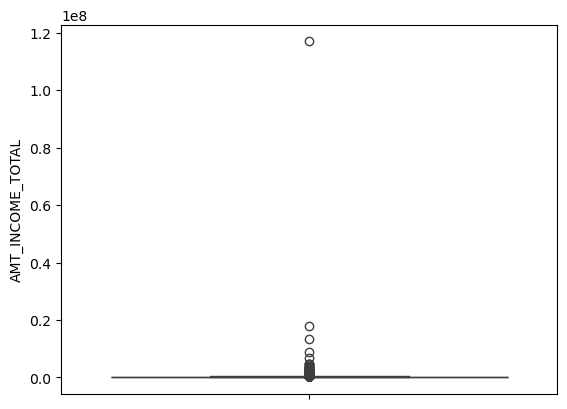

In [65]:
#Finding outlier for income column using box plot
sns.boxplot(app['AMT_INCOME_TOTAL'])
plt.show()

From the plot it can be inferred that the outlier for clients income data is 117M

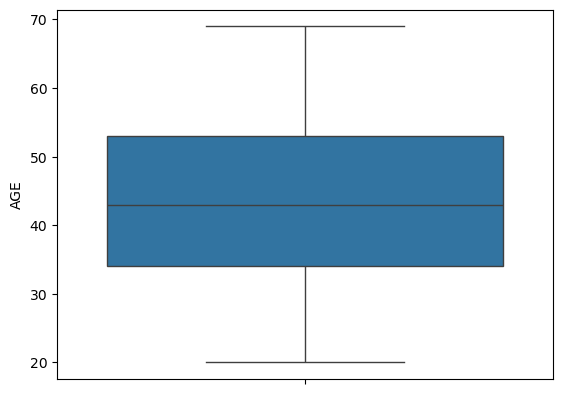

In [66]:
#Finding the outliers for age
sns.boxplot(app['AGE'])
plt.show()

The age variable doesn't show any outliers

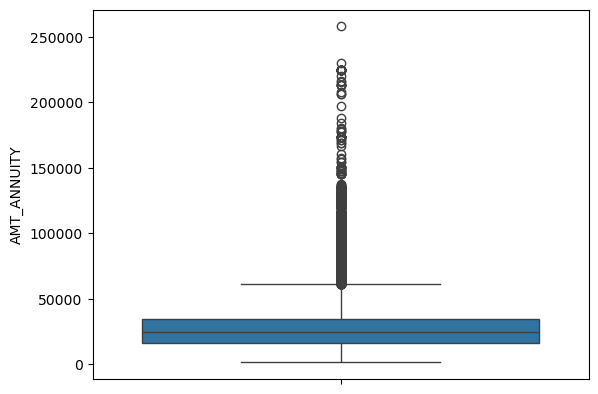

In [67]:
#Finding the outliers for amount annuity
sns.boxplot(app['AMT_ANNUITY'])
plt.show()

The outlier for the column amt annuity is greater than 250000

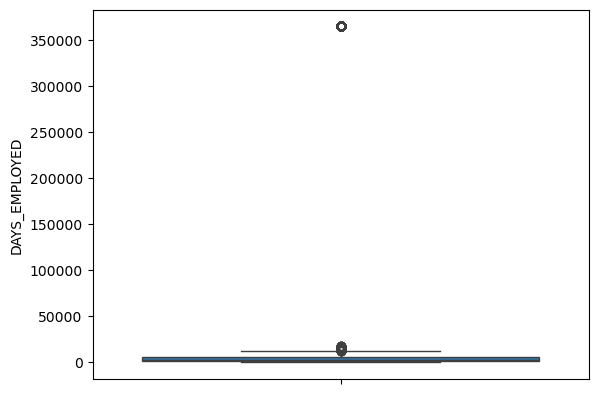

In [68]:
#Finding the outliers for days employed
sns.boxplot(app['DAYS_EMPLOYED'])
plt.show()

The value is present greater than 30000 is surely an outlier as the client has worked around 30000/365 + 20 years if started working at 20

### 3. Analysis

#### The aim of this case study is to identify the applicants who are capable of repaying the loans by identifying the attributes indicating default, the column target variable provides information about if client is having payment difficulties or not, so analysing the data imbalance for that column 

### Data Imbalance

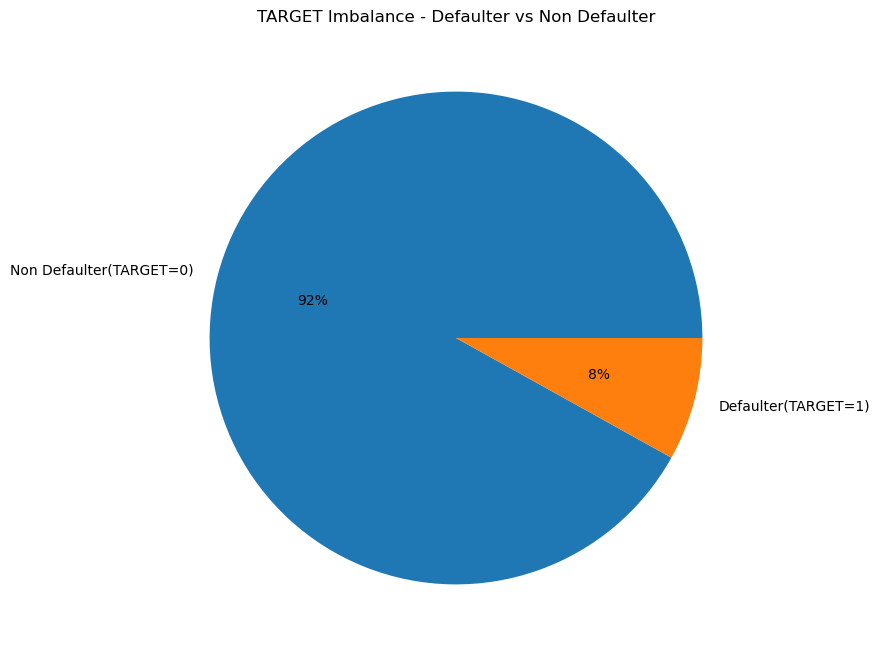

In [69]:
# Target column provides binary data, so identifying the perecentage for that, '1' indicating defaulters as per the data dictionary and '0' being non defaulters 
plt.figure(figsize = (8,8))
plt.pie(app['TARGET'].value_counts(normalize = True)*100, labels = ['Non Defaulter(TARGET=0)','Defaulter(TARGET=1)'],autopct = '%1.f%%')
plt.title('TARGET Imbalance - Defaulter vs Non Defaulter')
plt.show()

There is an imbalance between the target variable values, non defaulters are 92% and defaulters are 8%

In [70]:
# Calculation of the imbalance present
print("There is an imbalance between defaulters and not defaulters. The non defaulters are",np.ceil(max(app['TARGET'].value_counts(normalize = True)*100)/min(app['TARGET'].value_counts(normalize = True)*100)) ,"times the defaulters.")

There is an imbalance between defaulters and not defaulters. The non defaulters are 12.0 times the defaulters.


### 3.1 Univariate Analysis

#### Unordered Univariate Analysis

In [71]:
# Function to plot for categorical analysis(count plot)
# Providing the variable from application data set and annotating it's percent value on the top of the bar of the count plot 
def uni_plot_app(var):
    fig = plt.figure(figsize = (10,5))
    plt.title(f'Distribution of {var} in clients application data')
    plt.xticks(rotation = 45)
    splot = sns.countplot(x= var, data = app)
    for p in splot.patches:
        splot.annotate('{:.1f}%'.format((p.get_height()/len(app))*100), (p.get_x()+p.get_width()/2, p.get_height()), ha = "center", va = "center") 
    plt.show()

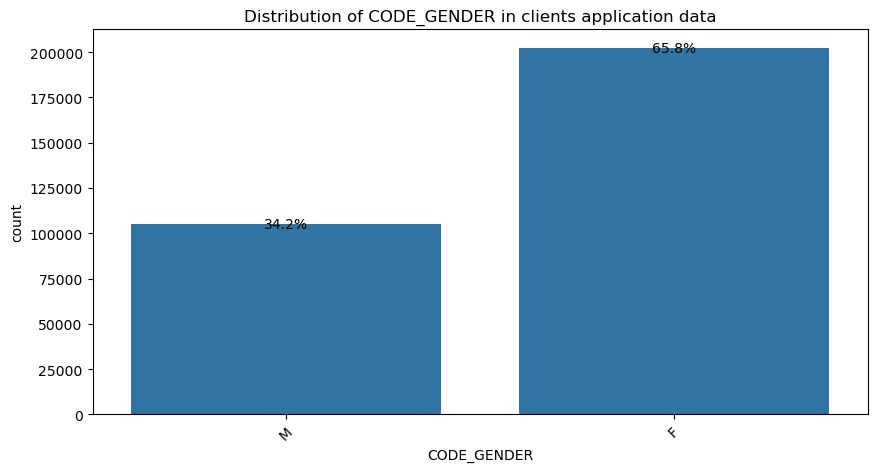

In [72]:
#Identifying gender pattern of client from application data 
uni_plot_app('CODE_GENDER')

The above graph shows that the Females applied for loans more than Males, with Female percent as 65.8% and 34.2% for Males

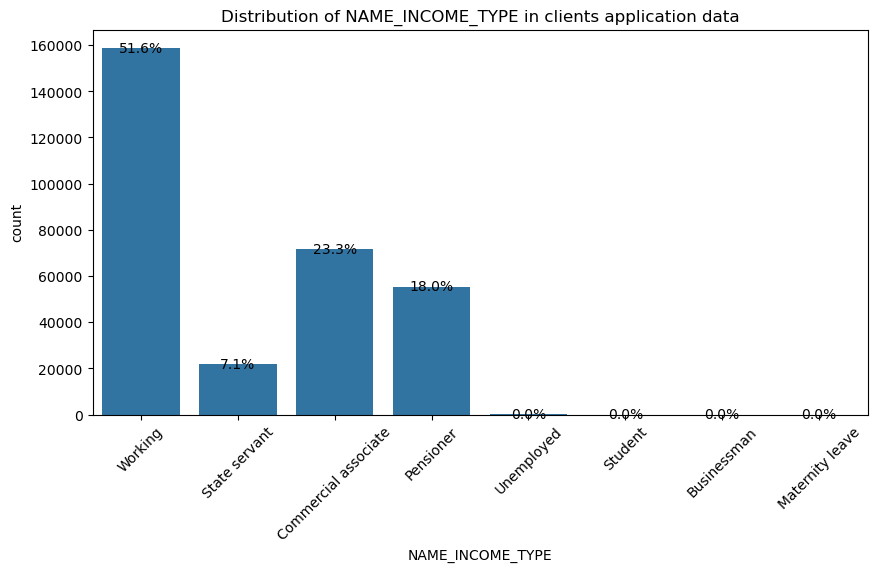

In [73]:
#Identifying income type pattern of client from application data 
uni_plot_app('NAME_INCOME_TYPE')

The clients with income type working has the highest percentage of application for loans with 51.6%

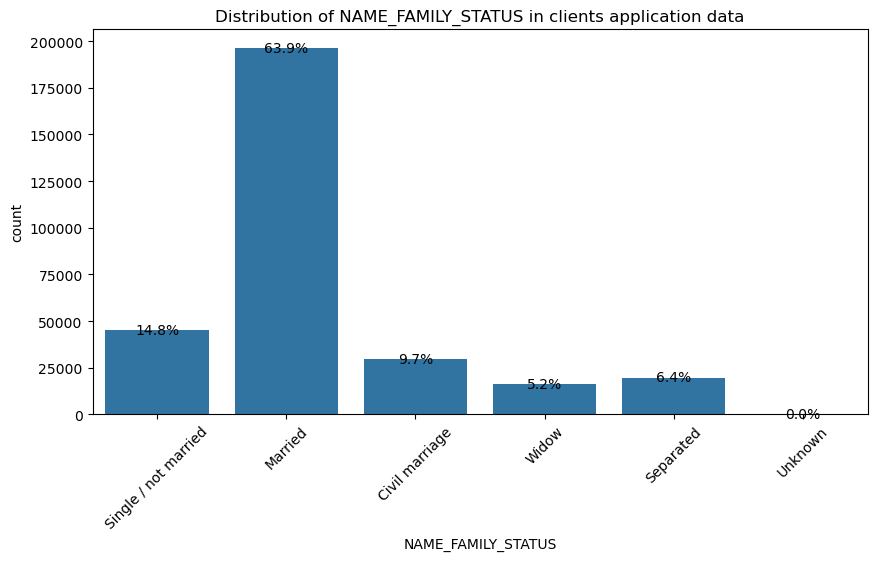

In [74]:
#Identifying family status pattern of client from application data 
uni_plot_app('NAME_FAMILY_STATUS')

Married clients have the highest percentage of loan applications with 63.9%

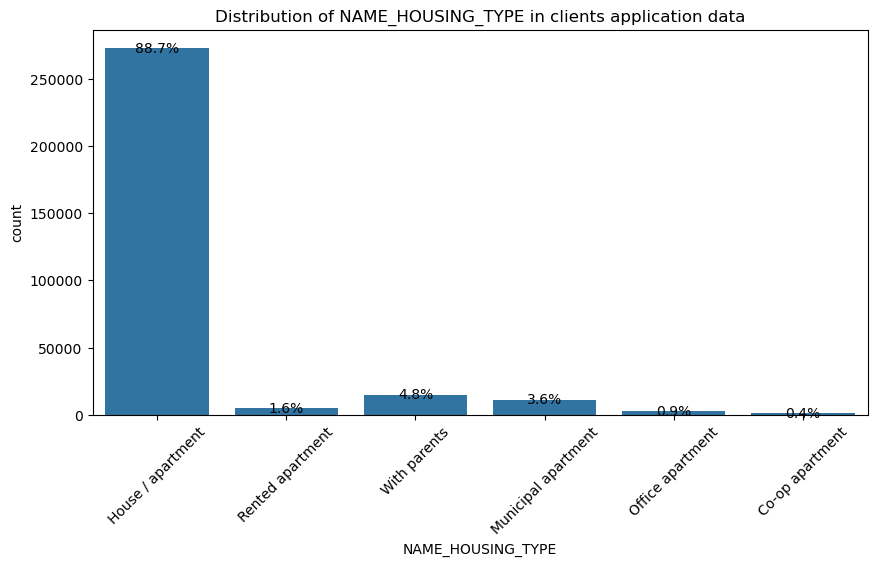

In [75]:
#Identifying housing type pattern of client from application data 
uni_plot_app('NAME_HOUSING_TYPE')

The clients with own house/ appartment applied for loans is the highest with 88.7%

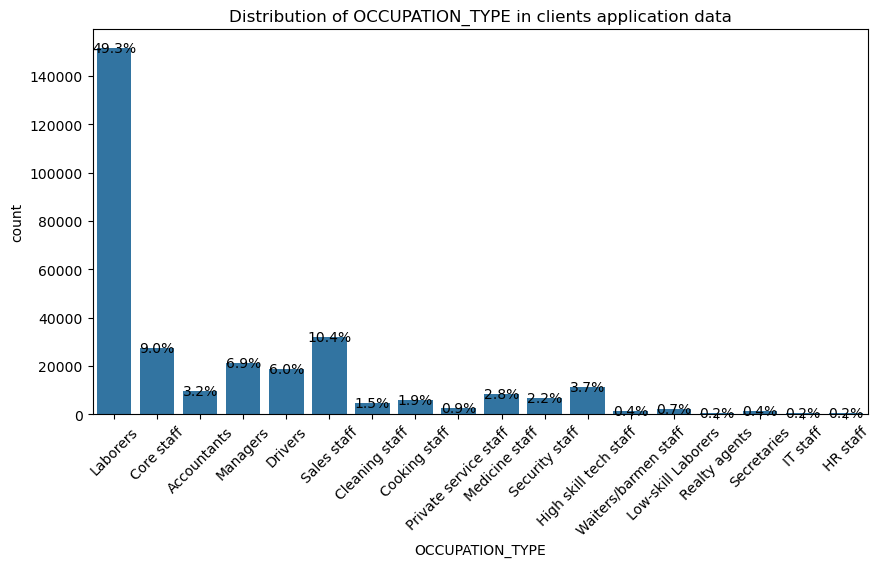

In [76]:
uni_plot_app('OCCUPATION_TYPE')

The above plot provides the information that the clients applying for loans are laborers  by occupation with 49.3% 

#### Ordered Univariate Analysis

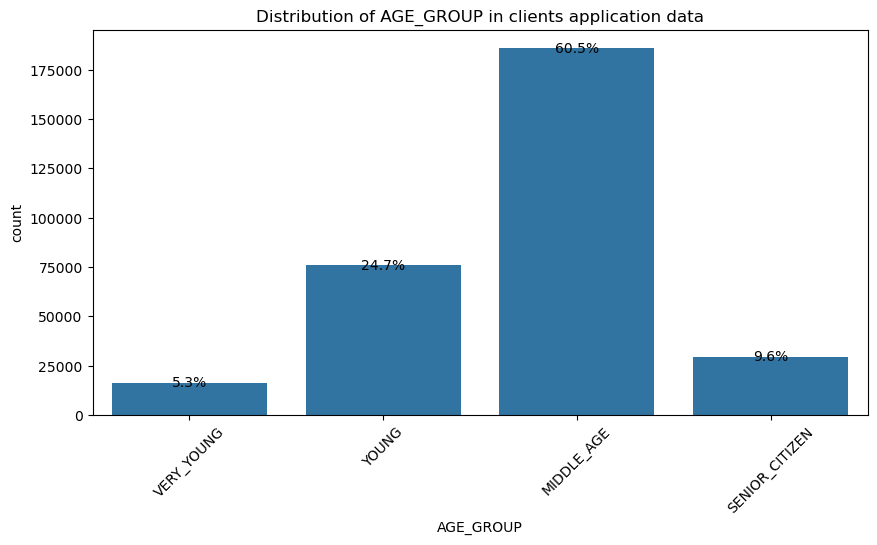

In [77]:
#Identifying age pattern of client from application data 
uni_plot_app('AGE_GROUP')

The middle age group applications have the highest percentage of 60.5

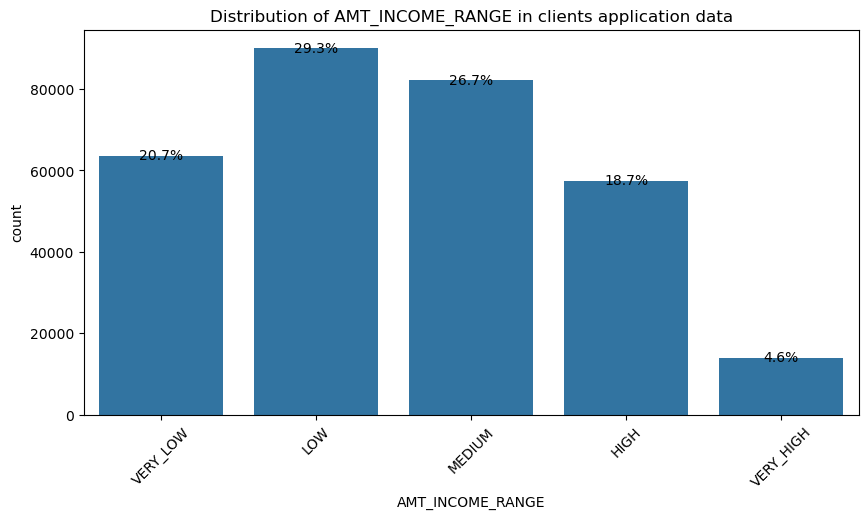

In [78]:
#Identifying income range pattern of client from application data 
uni_plot_app('AMT_INCOME_RANGE')

Clients having Income Range low and medium applies the highest number of times in respective order 29.3% and 26.7% 

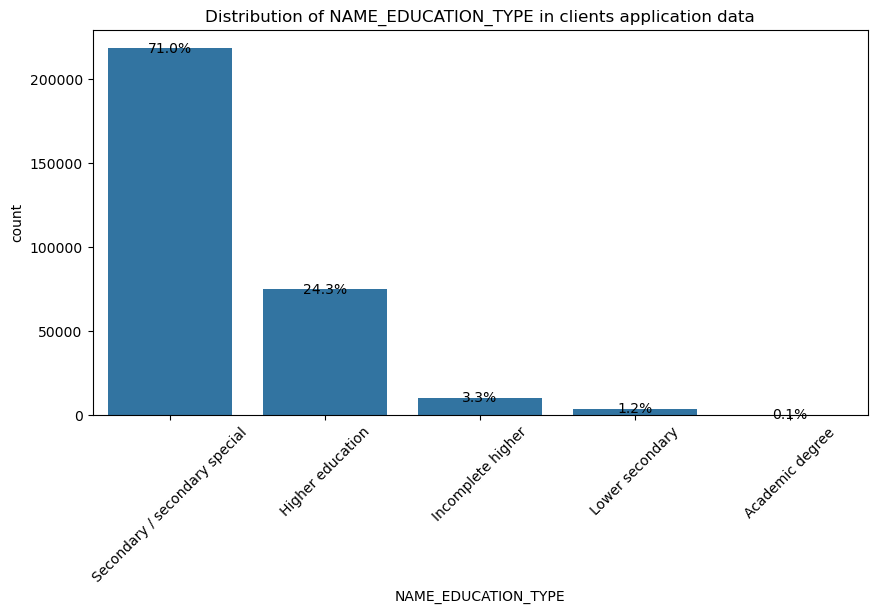

In [79]:
#Identifying education type of client from application data 
uni_plot_app('NAME_EDUCATION_TYPE')

The clients with secondary education applies hightes with 71% and least being applications with academic degree

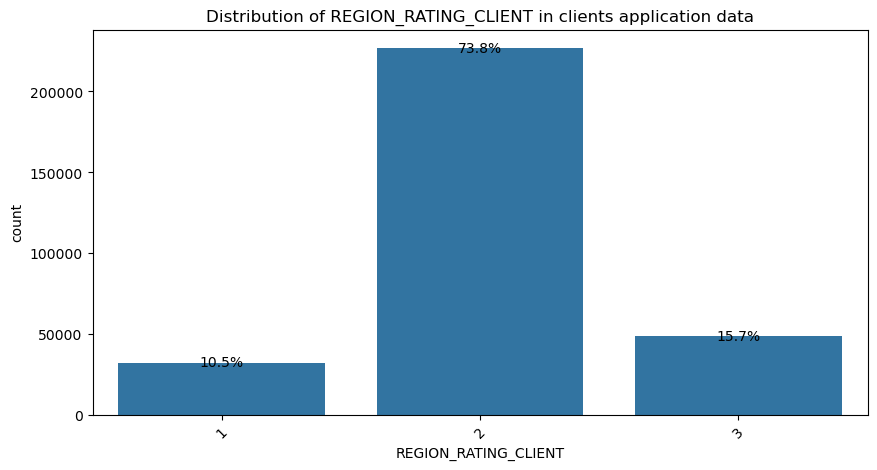

In [80]:
#Identifying region rating wise pattern of client from application data 
uni_plot_app('REGION_RATING_CLIENT')

The region with Rating 2 shows highest number of applications with 73.8%

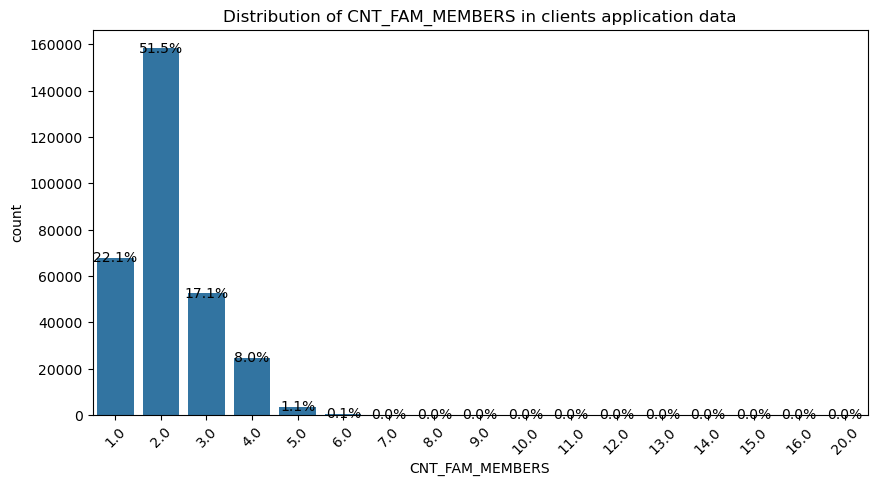

In [81]:
uni_plot_app('CNT_FAM_MEMBERS')

Clients with 2 and 1 family members applies for loans most

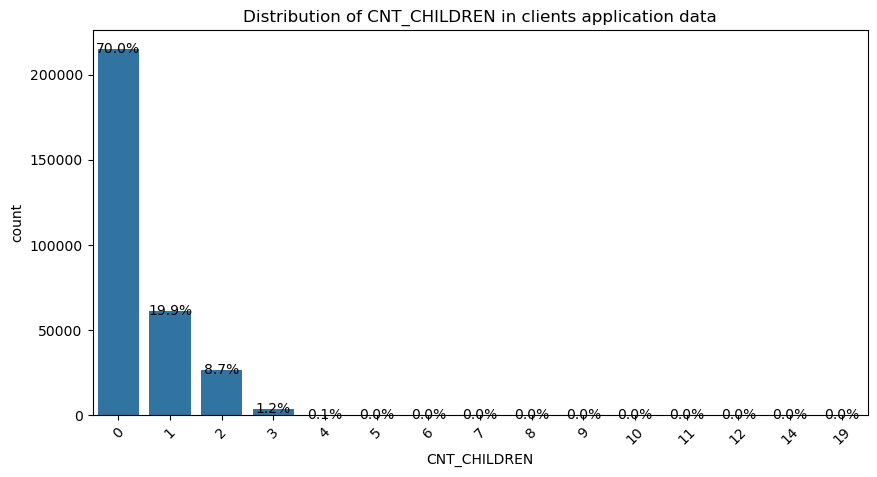

In [82]:
uni_plot_app('CNT_CHILDREN')

#### Univariate Analysis on Continous Numerical Variables

In [83]:
# Function to plot for statistical analysis(dist plot)
def uni_dist_app(var):
    fig = plt.figure(figsize = (10,5))
    plt.title(f'Distribution plot of {var} in clients application data')
    dplot = sns.distplot(app[var])
    plt.show()


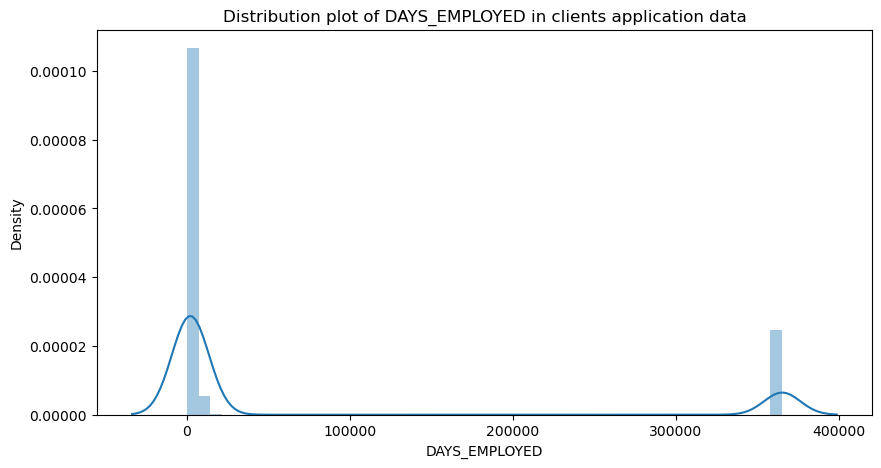

In [84]:
uni_dist_app('DAYS_EMPLOYED')

In [85]:
#Creating a new column Credit Income Ratio, since for this case study credit and income are very important continuous variables for analysing Target Variable 

app['CREDIT_INCOME_RATIO'] = round((app['AMT_CREDIT']/app['AMT_INCOME_TOTAL']),2)

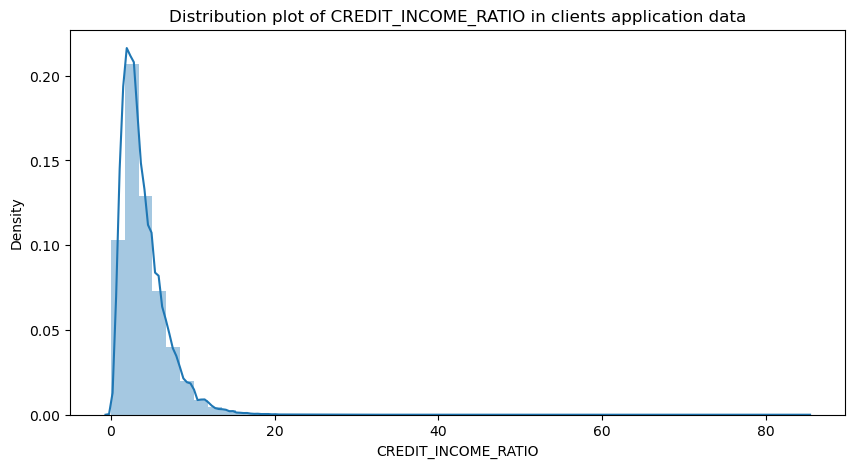

In [86]:
uni_dist_app('CREDIT_INCOME_RATIO')

The plot above shows that the maximum applications are received where credit to income ratio is 2

### Segmented Univariate Analysis

The Target column represents to values '1' and '0', defaulters and non defaulters respectively, the dataframe can be segregated into two dataframes for finding the pattern of variable on target value

In [87]:
# Creating two dataframes by filtering on basis of Target Value
app_default = app[app.TARGET == 1] # For Defaulters
app_non_default = app[app.TARGET == 0] # For Non Defaulters

#### Segmented Categorical Univariate Analysis 

In [88]:
#Function to plot for categorical analysis(count plot) for segmented Dataframe comparisons using subplots
# univariate plot with comparison hence function name as uni_plot_app_comp
#using count plots and the subplots name as a1 and a2 using annotation to provide the percent value of the count in the top of the bar

def uni_plot_app_comp(var):
    fig, (a1,a2) = plt.subplots(1,2,figsize = (15,5))
    
    sns.countplot(x = var, data = app_default, ax = a1)
    a1.set_ylabel('Total count')
    a1.set_title(f'Distribution of {var} in Defaulter clients application data')
    a1.set_xticklabels(a1.get_xticklabels(),rotation = 45)
    
    for p in a1.patches:
        a1.annotate('{:.1f}%'.format((p.get_height()/len(app_default))*100), (p.get_x()+p.get_width()/2, p.get_height()+25), ha = "center", va = "center") 
    
    sns.countplot(x = var, data = app_non_default, ax = a2)
    a2.set_ylabel('Total count')
    a2.set_title(f'Distribution of {var} in Non Defaulter clients application data')
    a2.set_xticklabels(a2.get_xticklabels(),rotation = 45)
    
    for p in a2.patches:
        a2.annotate('{:.1f}%'.format((p.get_height()/len(app_non_default))*100), (p.get_x()+p.get_width()/2, p.get_height()+25), ha = "center", va = "center") 
    plt.show()    
    

#### Segmented Unordered Univariate Analysis

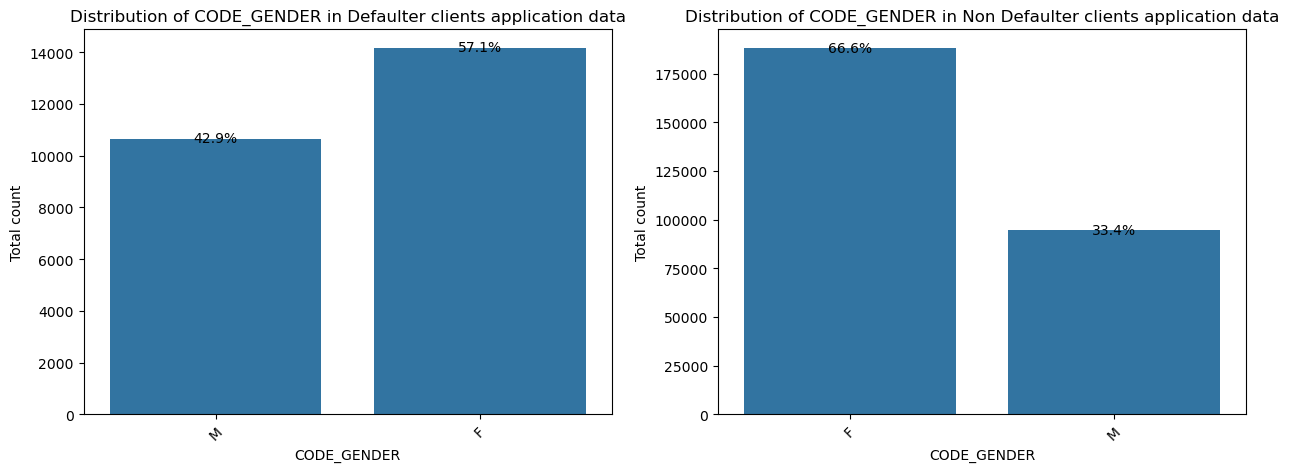

In [89]:
uni_plot_app_comp('CODE_GENDER')

The female clients are more in both the non defaulter and defaulter list, the values being 66.6% ans 57.1% respectively.
From the inferences of the unsegmented analysis, the female clients apply for loans more than men.
#### The number of females in the non defaulters are much more than males

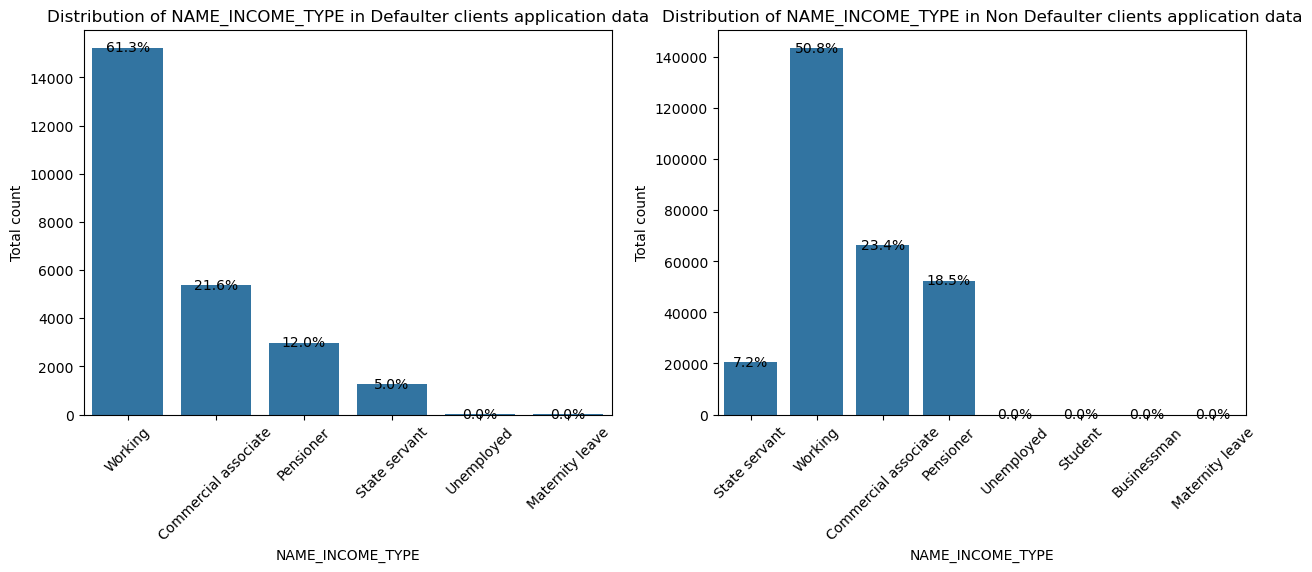

In [90]:
uni_plot_app_comp('NAME_INCOME_TYPE')

The plot provides insights that the students and Businessmen don't default, since it is not present in the defaulters plot.
From the unsegmented analysis it was seen than working class applies the most and from the plot it can be seen that they are defaulters with 61.3% and 50.8% non defaulters

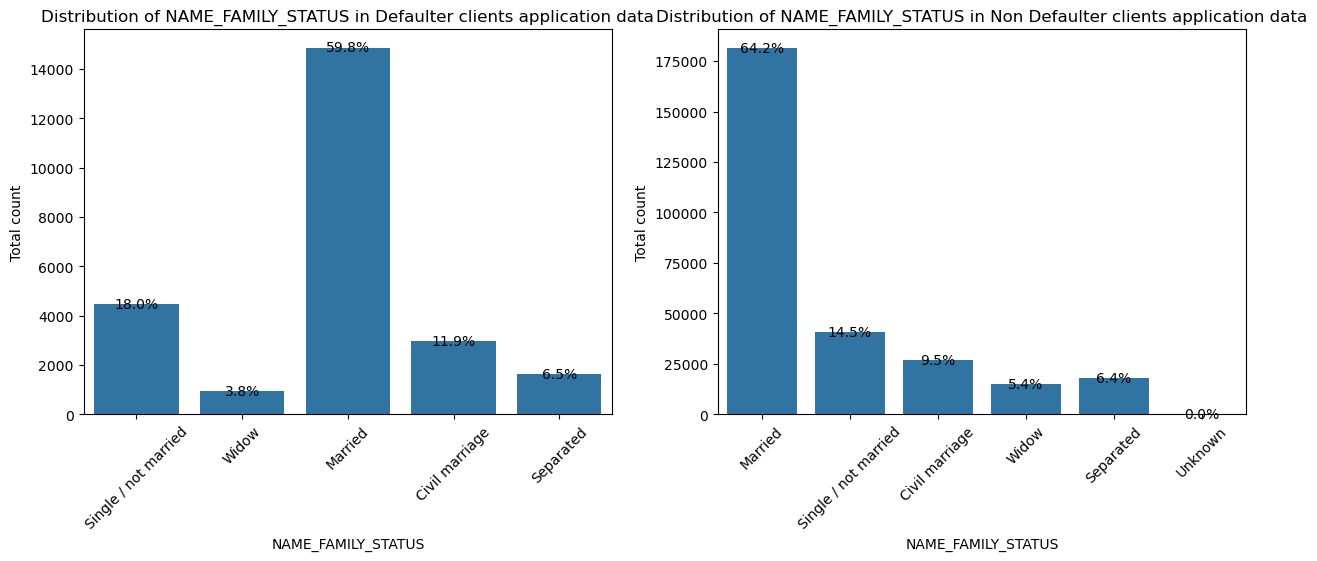

In [91]:
uni_plot_app_comp('NAME_FAMILY_STATUS')

Married people applies for more loans but it can also be seen that only single people have higher defaulter percentage than their non defaulters percentage, with 18% defaulter rate and 14.5% non defaulter rate
#### Single people show higher risks of defaulters than non defaulters

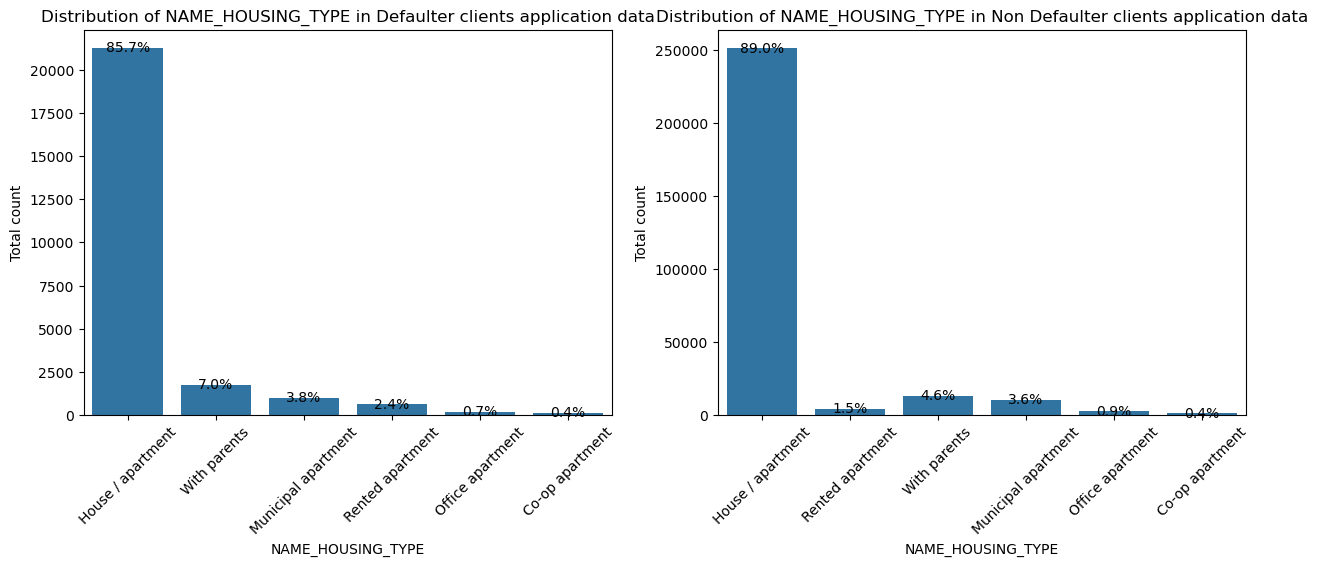

In [92]:
uni_plot_app_comp('NAME_HOUSING_TYPE')

It can be inferred that clients with parents and rented appartment have higher defaulter rates than their non defaulters 

#### Segmented Ordered Univariate Analysis

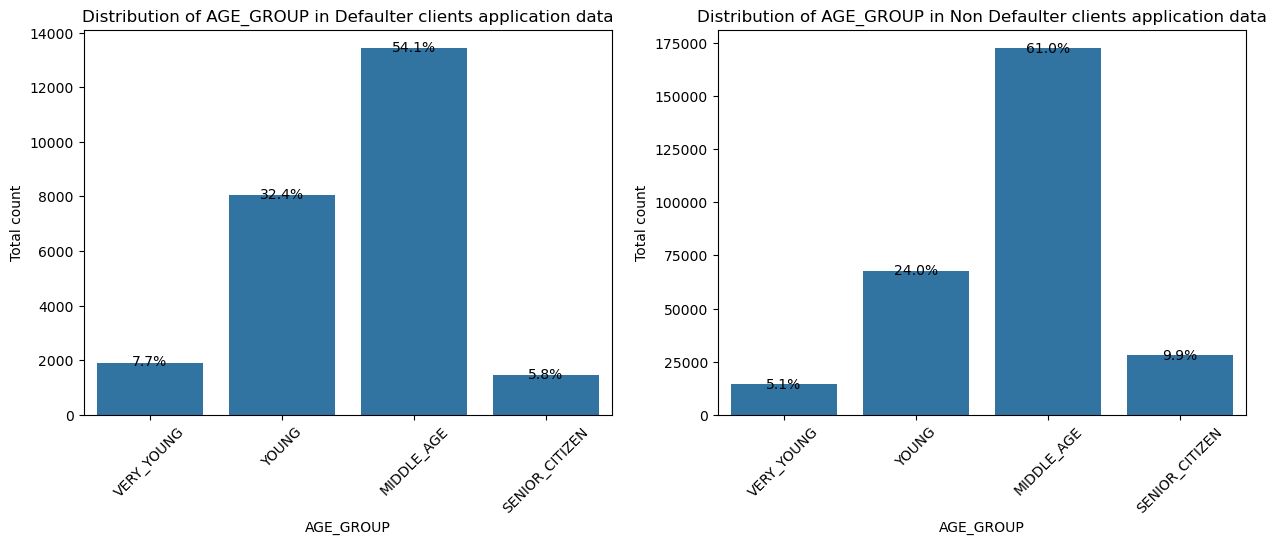

In [93]:
uni_plot_app_comp('AGE_GROUP')

It can be infered that the very young and young age group defaults more hence more risk associated

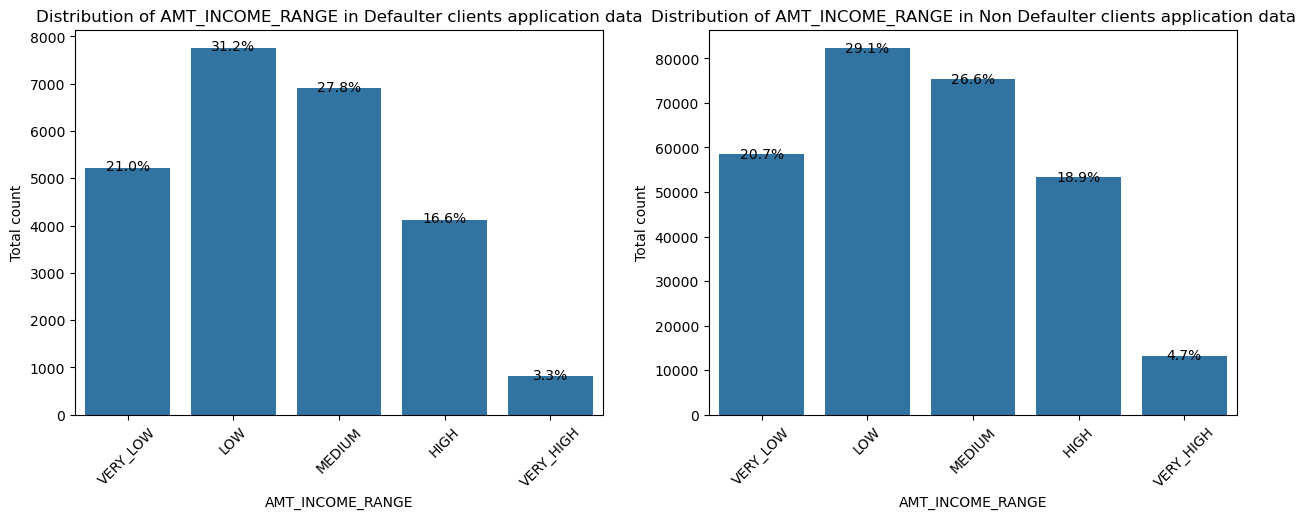

In [94]:
uni_plot_app_comp('AMT_INCOME_RANGE')

The clients with High and Very Hign income defaults less than the clients with other income groups

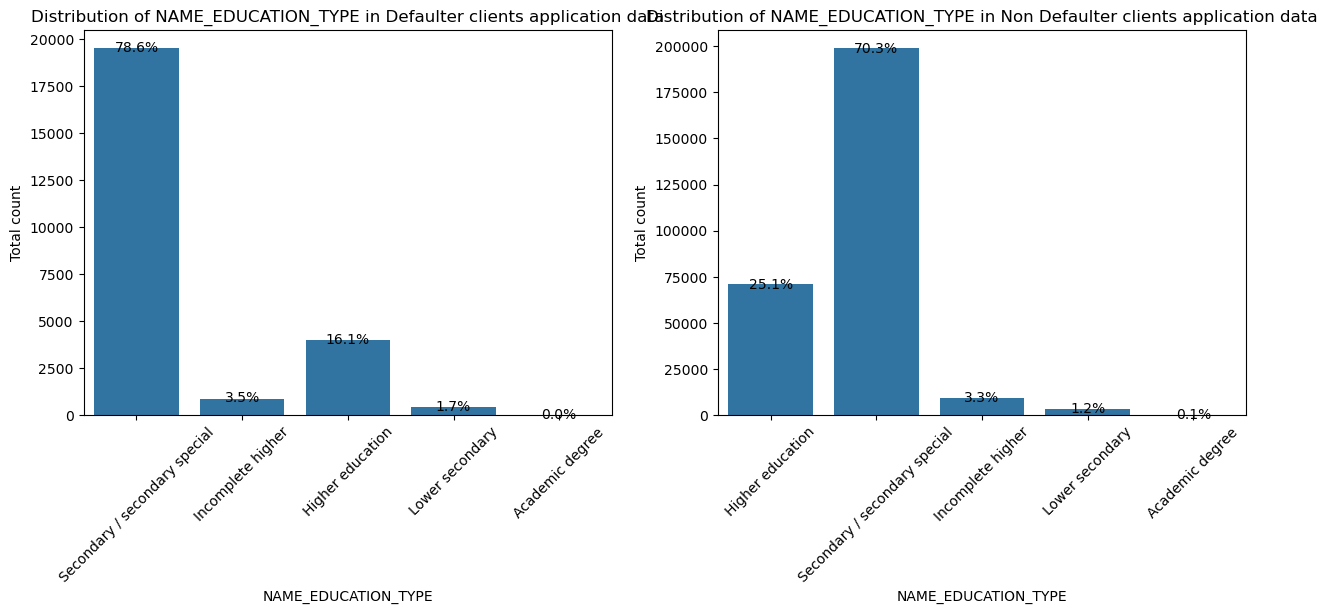

In [95]:
uni_plot_app_comp('NAME_EDUCATION_TYPE')

Secondary educated clients have higher defaulter percentage

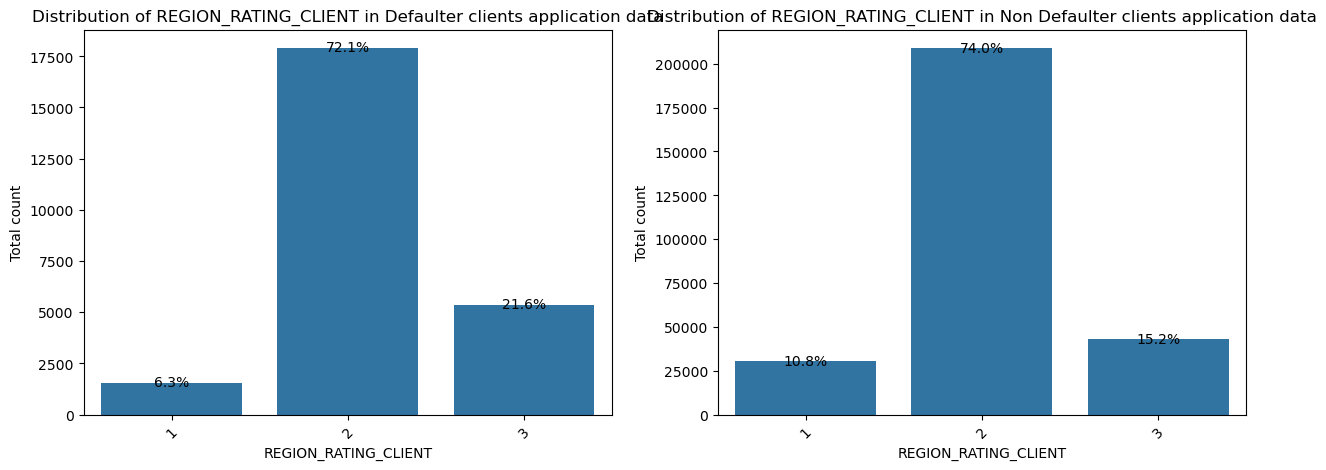

In [96]:
uni_plot_app_comp('REGION_RATING_CLIENT')

Clients living in Rating 3 region shows higher defaulter percentage than in non defaulters data

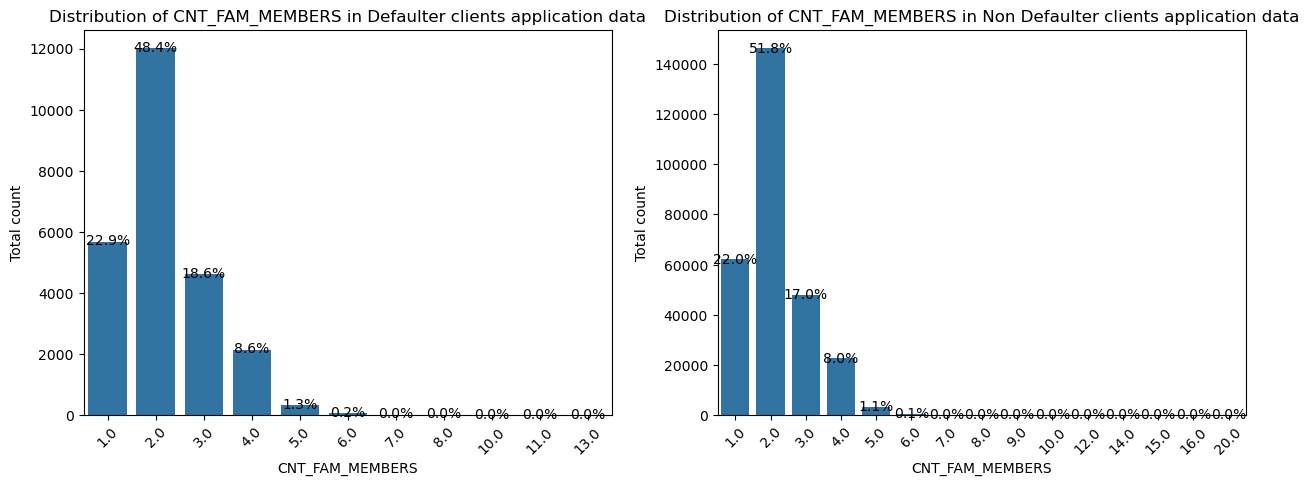

In [97]:
uni_plot_app_comp('CNT_FAM_MEMBERS')

Clients have similar percentage rate of in both defaulter and non defaulter based on the family members count

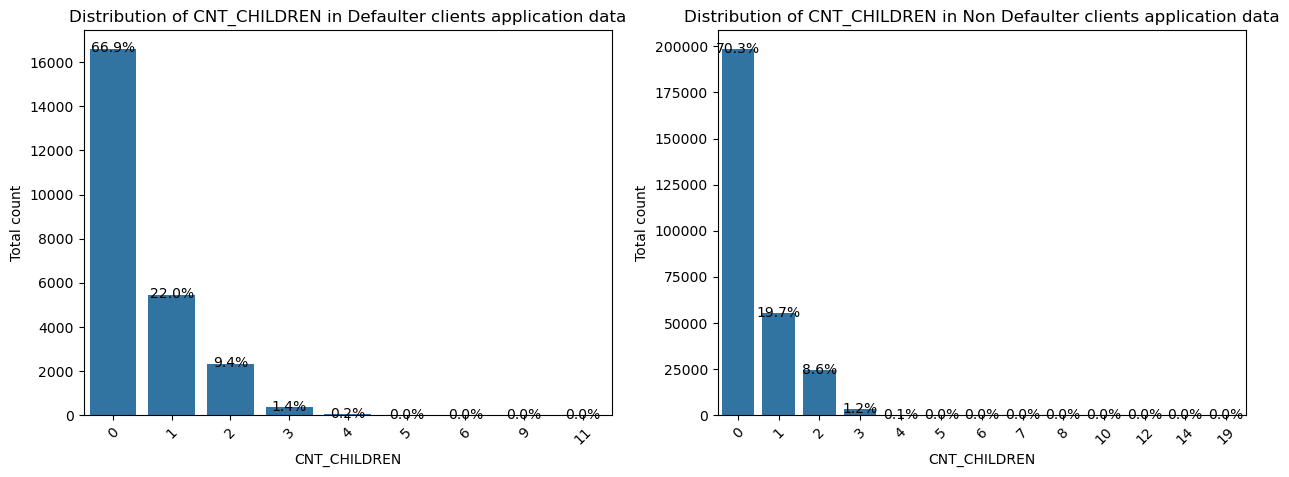

In [98]:
uni_plot_app_comp('CNT_CHILDREN')

Clients with 1 or more than 1 child have higher defaulters rates as compared to non defaulters rates

#### Segmented Univariate Analysis on Continous Numerical Variable

In [99]:
# Function to plot for statistical analysis(dist plot)
def uni_dist_app_comp(var):
    fig,(a1,a2) = plt.subplots(1,2,figsize = (15,5))
    
    sns.distplot(a = app_default[var],ax = a1)
    a1.set_title(f'Distribution plot of {var} in Defaulter clients application data')
    
    sns.distplot(a = app_non_default[var],ax = a2)
    a2.set_title(f'Distribution plot of {var} in Non Defaulter clients application data')

    plt.show()


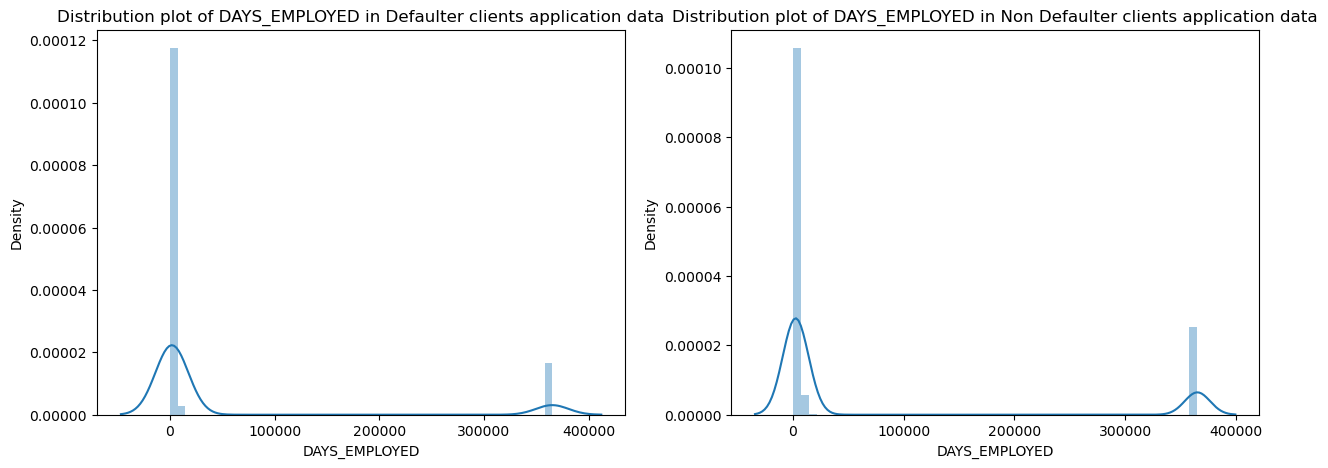

In [100]:
uni_dist_app_comp('DAYS_EMPLOYED')

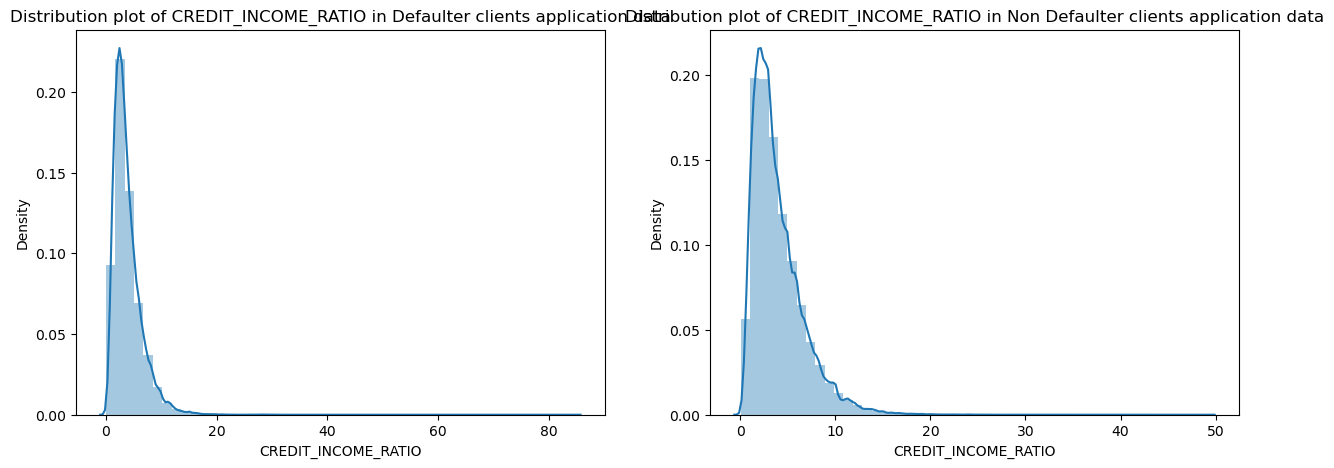

In [101]:
uni_dist_app_comp('CREDIT_INCOME_RATIO')

### 3.2 Bivariate and Multivariate Analysis

#### Numeric Vs Numeric Bivariate Analysis

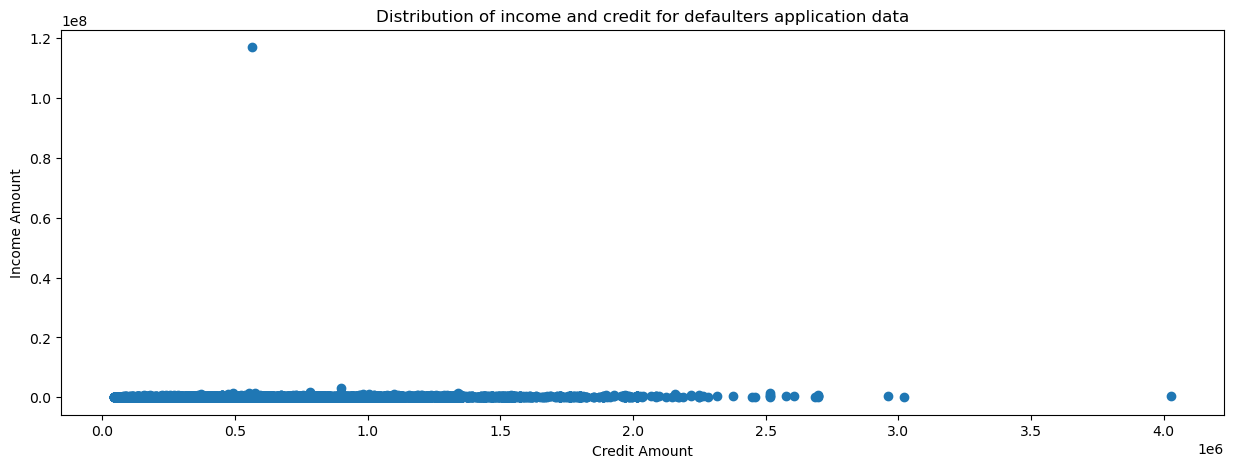

In [102]:
# Using scatter plot finding the pattern between income and credit amount of defaulters application
plt.figure(figsize = (15,5))
plt.scatter(x = app_default.AMT_CREDIT, y = app_default.AMT_INCOME_TOTAL)
plt.xlabel('Credit Amount')
plt.ylabel('Income Amount')
plt.title('Distribution of income and credit for defaulters application data')
plt.show()

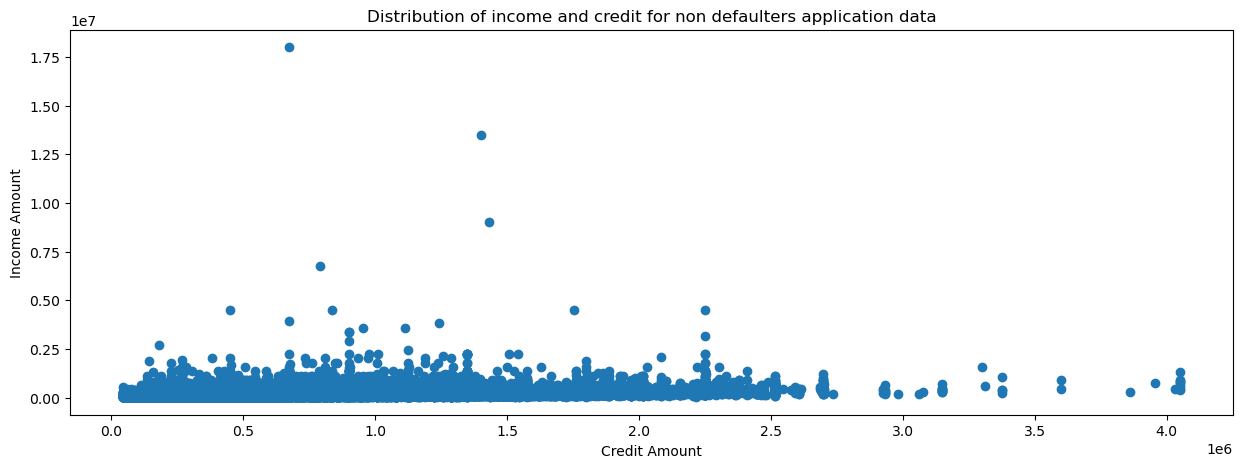

In [103]:
# Using scatter plot finding the pattern between income and credit amount of non defaulters application
plt.figure(figsize = (15,5))
plt.scatter(x = app_non_default.AMT_CREDIT, y = app_non_default.AMT_INCOME_TOTAL)
plt.xlabel('Credit Amount')
plt.ylabel('Income Amount')
plt.title('Distribution of income and credit for non defaulters application data')
plt.show()

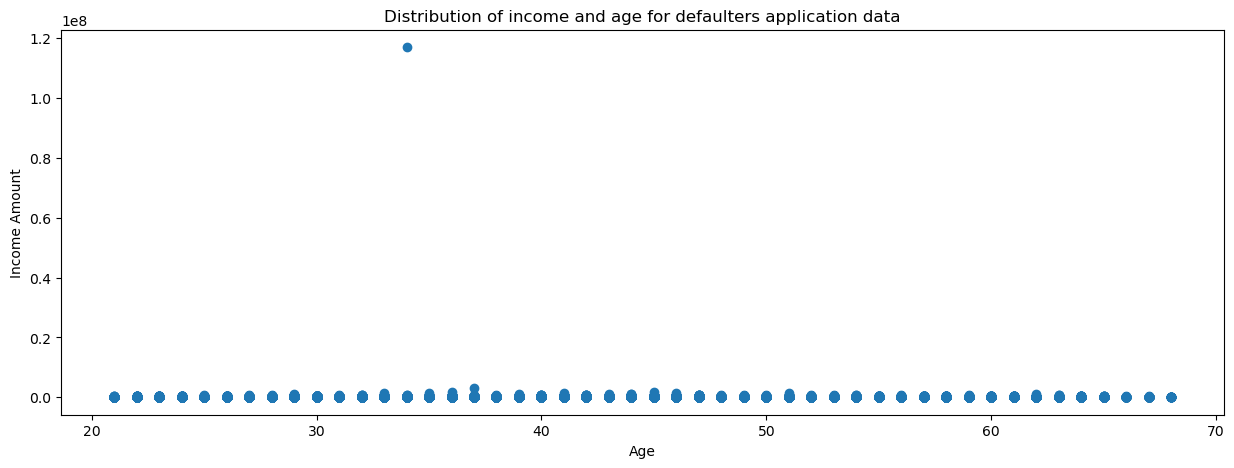

In [104]:
# Using scatter plot finding the pattern between age and income of defaulters application
plt.figure(figsize = (15,5))
plt.scatter(x = app_default.AGE, y = app_default.AMT_INCOME_TOTAL)
plt.xlabel('Age')
plt.ylabel('Income Amount')
plt.title('Distribution of income and age for defaulters application data')
plt.show()

There is a outlier in between the age band 30-40 in defaulters application

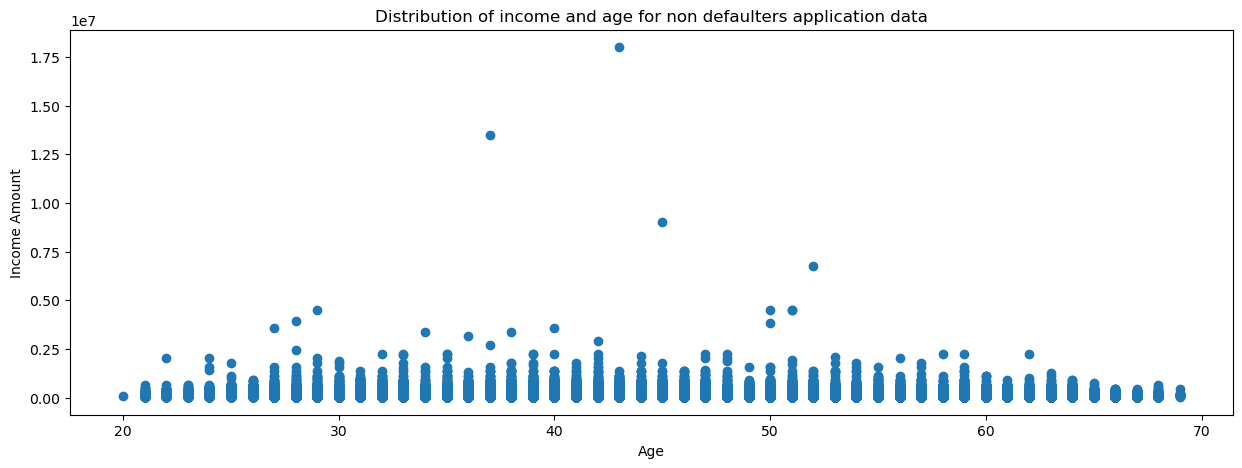

In [105]:
# Using scatter plot finding the pattern between age and income of non defaulters application
plt.figure(figsize = (15,5))
plt.scatter(x = app_non_default.AGE, y = app_non_default.AMT_INCOME_TOTAL)
plt.xlabel('Age')
plt.ylabel('Income Amount')
plt.title('Distribution of income and age for non defaulters application data')
plt.show()

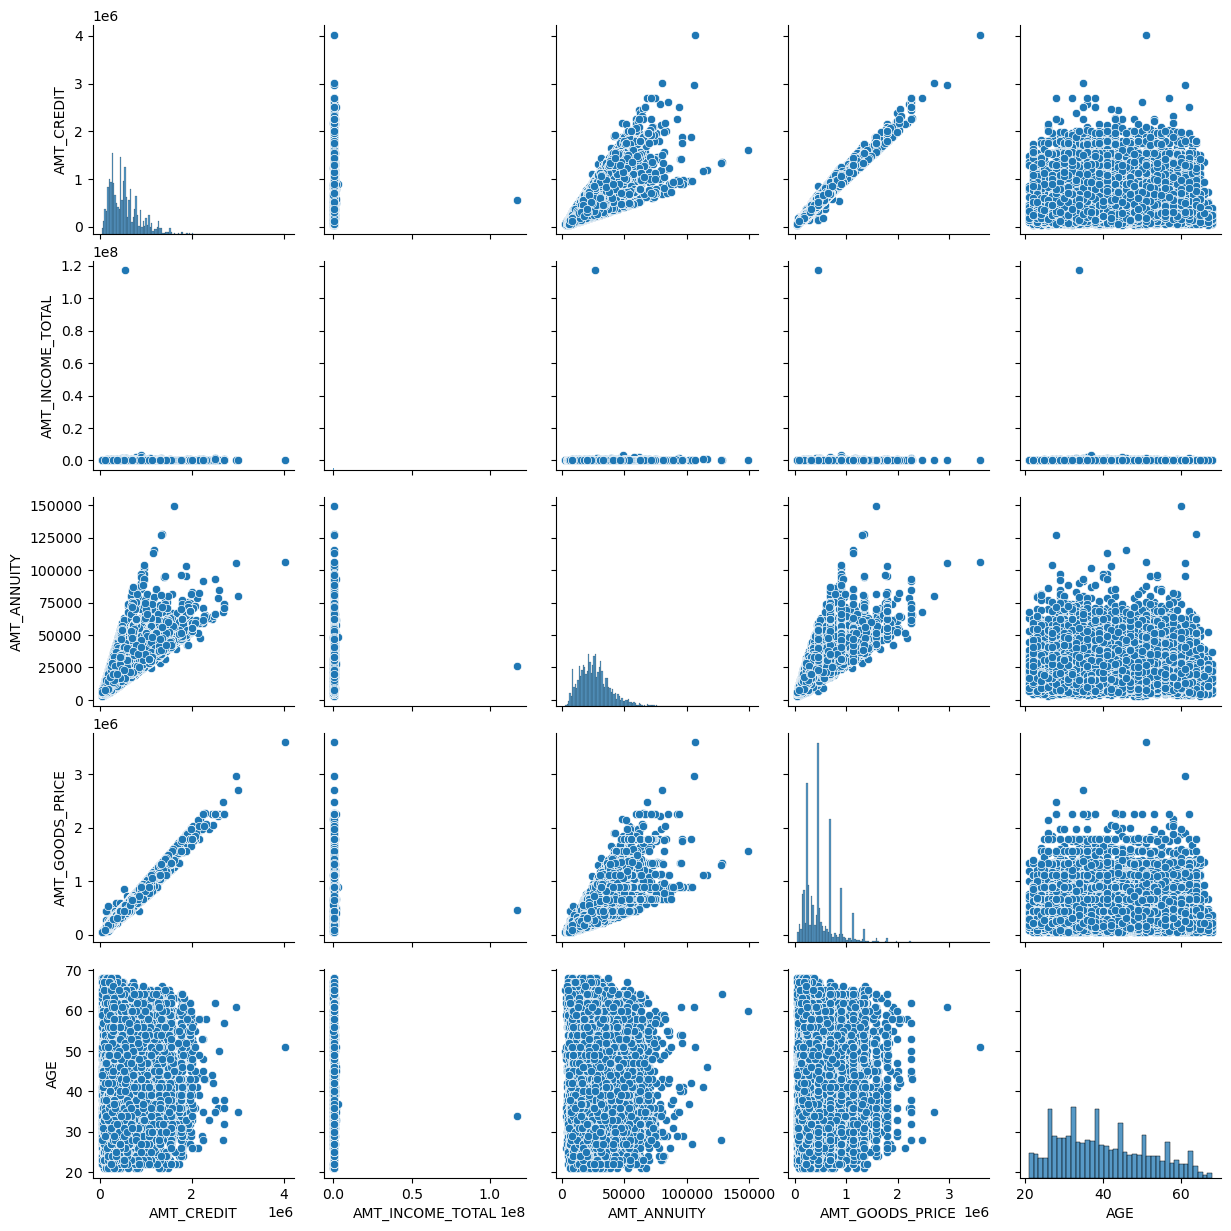

In [106]:
#Pair plots for all the continous numeric vs numeric variables for Defaulter Application Data
sns.pairplot(app_default[['AMT_CREDIT','AMT_INCOME_TOTAL', 'AMT_ANNUITY','AMT_GOODS_PRICE','AGE']])
plt.show()

There is a high correlation between amount goods price and amount credit for non defaulter data
There are irregularities present between income and credit amount
There are irregularities present between income and credit amount


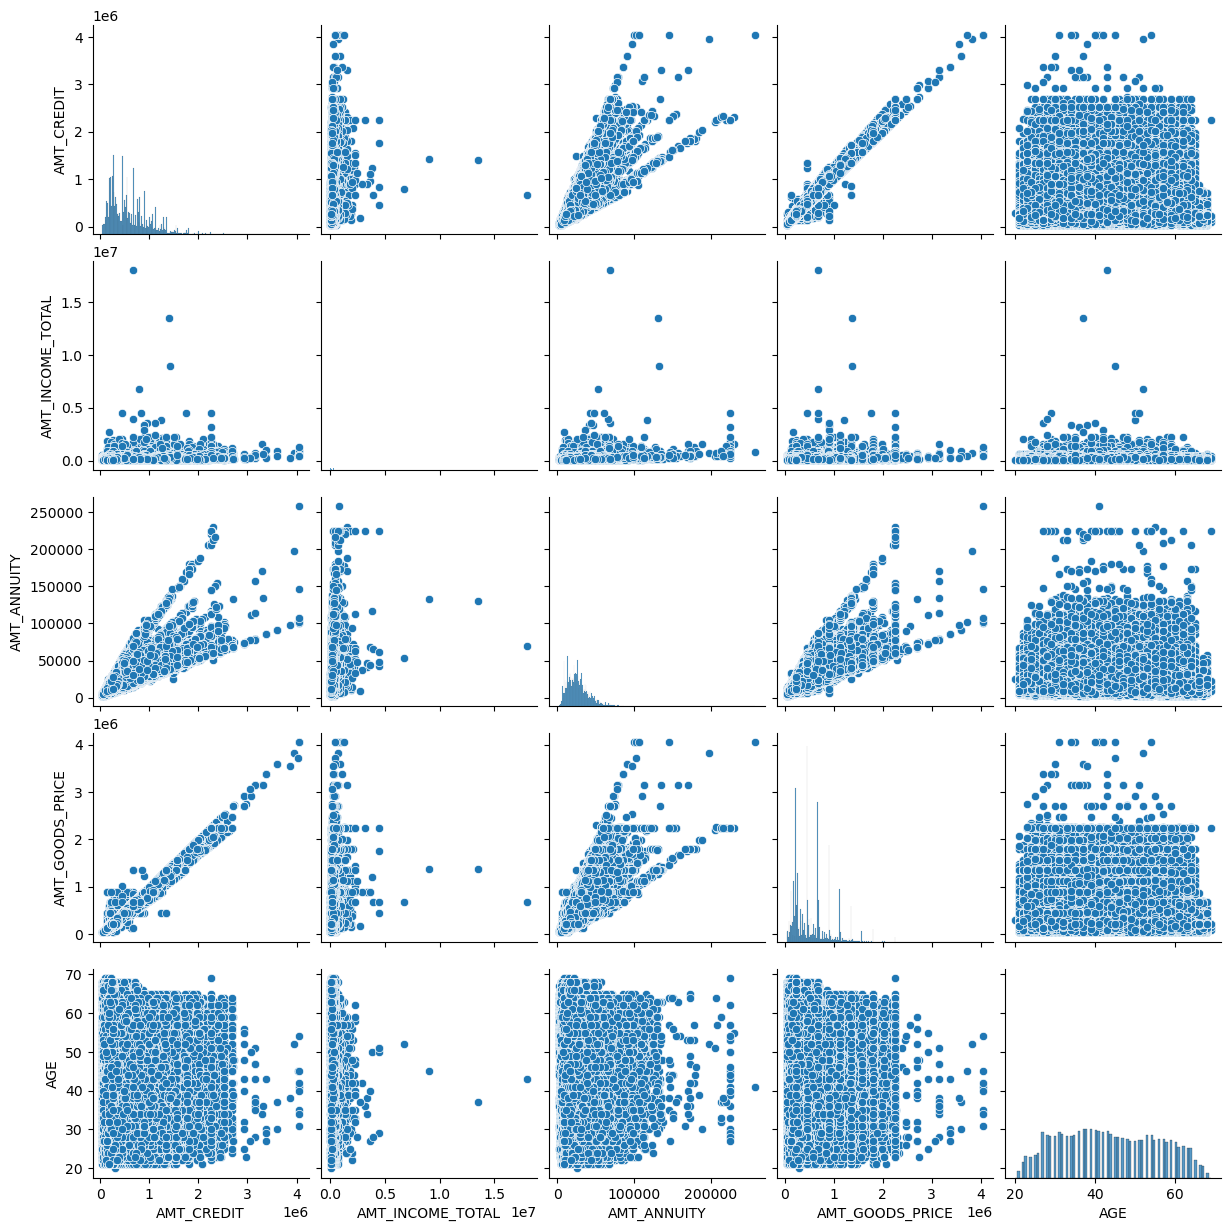

In [107]:
#Pair plots for all the continous numeric vs numeric variables for non Defaulter Application Data
sns.pairplot(app_non_default[['AMT_CREDIT','AMT_INCOME_TOTAL', 'AMT_ANNUITY','AMT_GOODS_PRICE','AGE']])
plt.show()

There is a high correlation between amount goods price and amount credit for non defaulter data
There are irregularities present between income and credit amount
There are irregularities present between income and credit amount


In [108]:
#Correlation Matrix for the above variables used in Pair plot to match the results for Non Defaulter Application Data
app_non_default[['AMT_CREDIT','AMT_INCOME_TOTAL', 'AMT_ANNUITY','AMT_GOODS_PRICE','AGE']].corr()


AMT_CREDIT  AMT_INCOME_TOTAL  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_CREDIT          1.000000          0.342799     0.771297         0.987022   
AMT_INCOME_TOTAL    0.342799          1.000000     0.418948         0.349426   
AMT_ANNUITY         0.771297          0.418948     1.000000         0.776421   
AMT_GOODS_PRICE     0.987022          0.349426     0.776421         1.000000   
AGE                 0.047366         -0.062494    -0.012251         0.044637   

                       AGE  
AMT_CREDIT        0.047366  
AMT_INCOME_TOTAL -0.062494  
AMT_ANNUITY      -0.012251  
AMT_GOODS_PRICE   0.044637  
AGE               1.000000

There is a very high correlation between amount goods price and amount credit for non defaulter data 

In [109]:
#Correlation Matrix for the above variables used in Pair plot to match the results for Defaulter Application Data
app_default[['AMT_CREDIT','AMT_INCOME_TOTAL', 'AMT_ANNUITY','AMT_GOODS_PRICE','AGE']].corr()


AMT_CREDIT  AMT_INCOME_TOTAL  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_CREDIT          1.000000          0.038131     0.752195         0.982783   
AMT_INCOME_TOTAL    0.038131          1.000000     0.046421         0.037591   
AMT_ANNUITY         0.752195          0.046421     1.000000         0.752295   
AMT_GOODS_PRICE     0.982783          0.037591     0.752295         1.000000   
AGE                 0.135070         -0.003154     0.014028         0.135532   

                       AGE  
AMT_CREDIT        0.135070  
AMT_INCOME_TOTAL -0.003154  
AMT_ANNUITY       0.014028  
AMT_GOODS_PRICE   0.135532  
AGE               1.000000

There is a very high correlation between amount goods price and amount credit for defaulter data 

<Axes: >

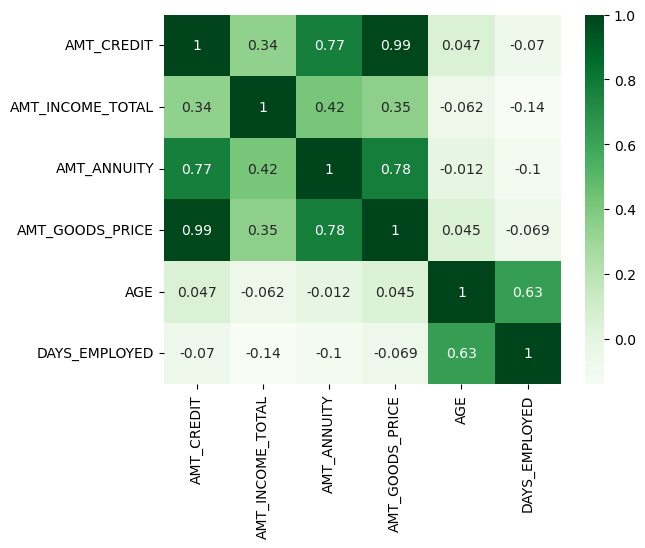

In [110]:
# Correlation Heat Map for Non Defaulter application Data 
sns.heatmap(app_non_default[['AMT_CREDIT','AMT_INCOME_TOTAL', 'AMT_ANNUITY','AMT_GOODS_PRICE','AGE','DAYS_EMPLOYED']].corr(),annot = True, cmap = "Greens" )

<Axes: >

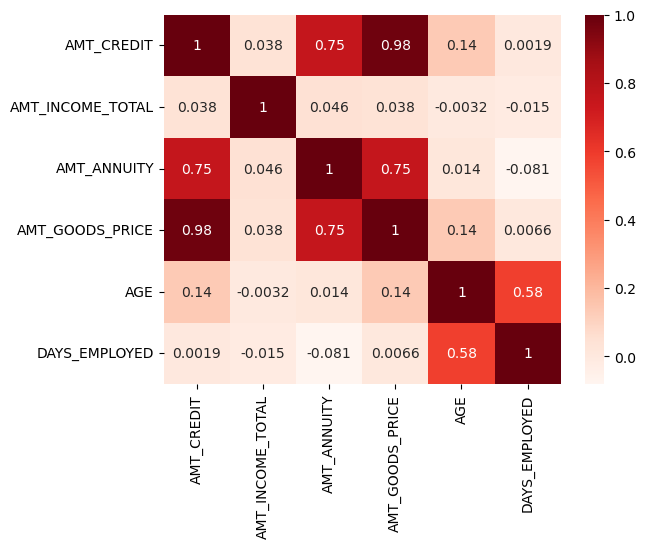

In [111]:
# Correlation Heat Map for Defaulter application Data 
sns.heatmap(app_default[['AMT_CREDIT','AMT_INCOME_TOTAL', 'AMT_ANNUITY','AMT_GOODS_PRICE','AGE','DAYS_EMPLOYED']].corr(),annot = True, cmap = "Reds" )

#### Numeric Vs Categoric Bivariate Analysis

In [112]:
# Function for numeric vs categoric bivariate analysis on application data 
#Plotting 2 subplots one representing defaulters data and the other being non defaulters data
def cat_num_biplot(var1, var2):
    fig,(a1,a2) = plt.subplots(2,1,figsize =(12,15))
    sns.boxplot(x = var1, y = var2, data = app_default, ax = a1 )
    a1.set_title(f'Distribution plot of {var1} and {var2} in Defaulter clients application data')
    
    sns.boxplot(x = var1, y = var2, data = app_default, ax = a2 )
    a2.set_title(f'Distribution plot of {var1} and {var2} in Non Defaulter clients application data')
    
    plt.show()

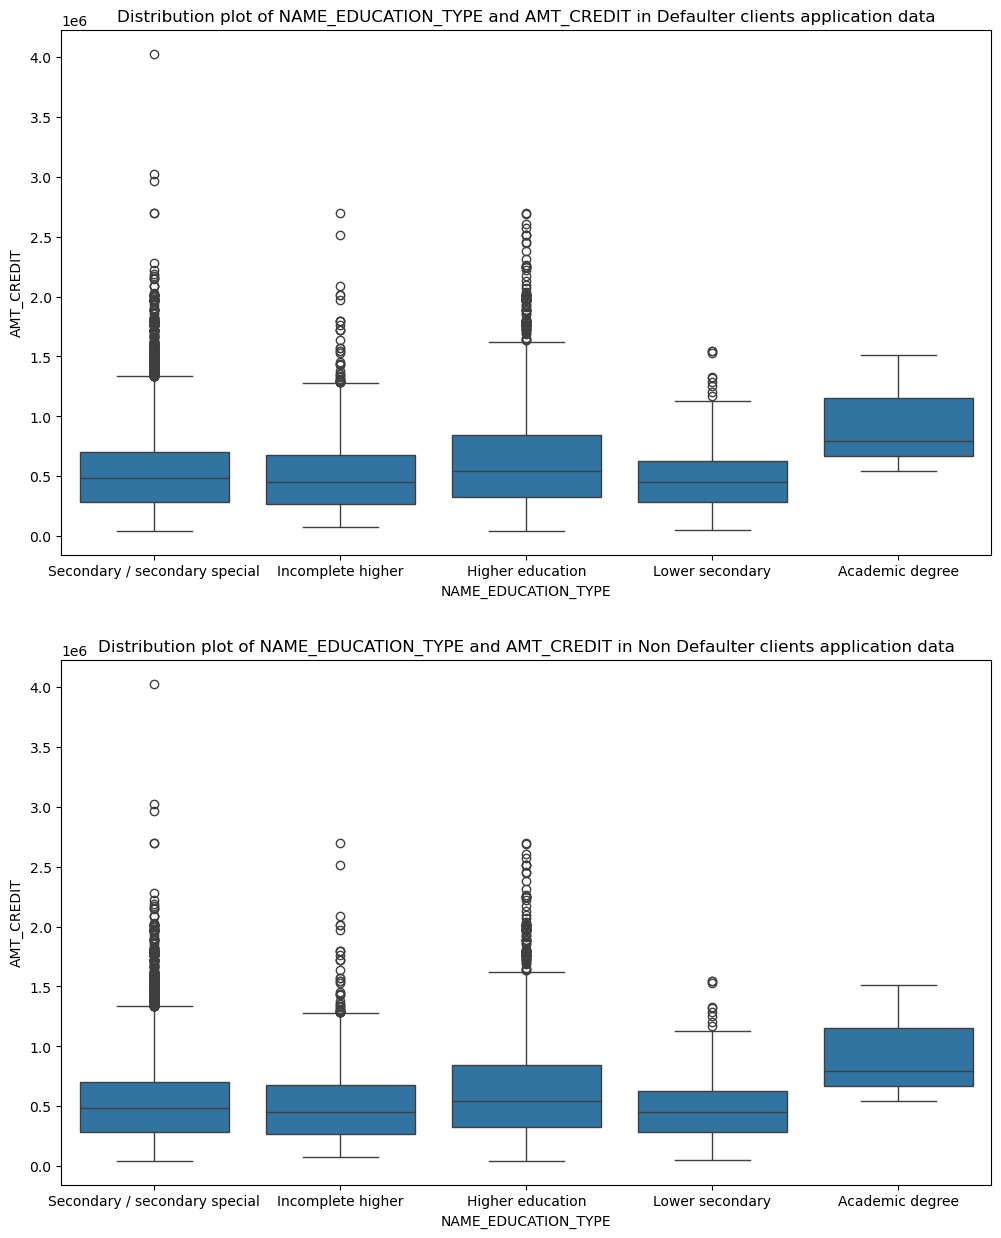

In [113]:
cat_num_biplot('NAME_EDUCATION_TYPE','AMT_CREDIT')

It can be inferred that 

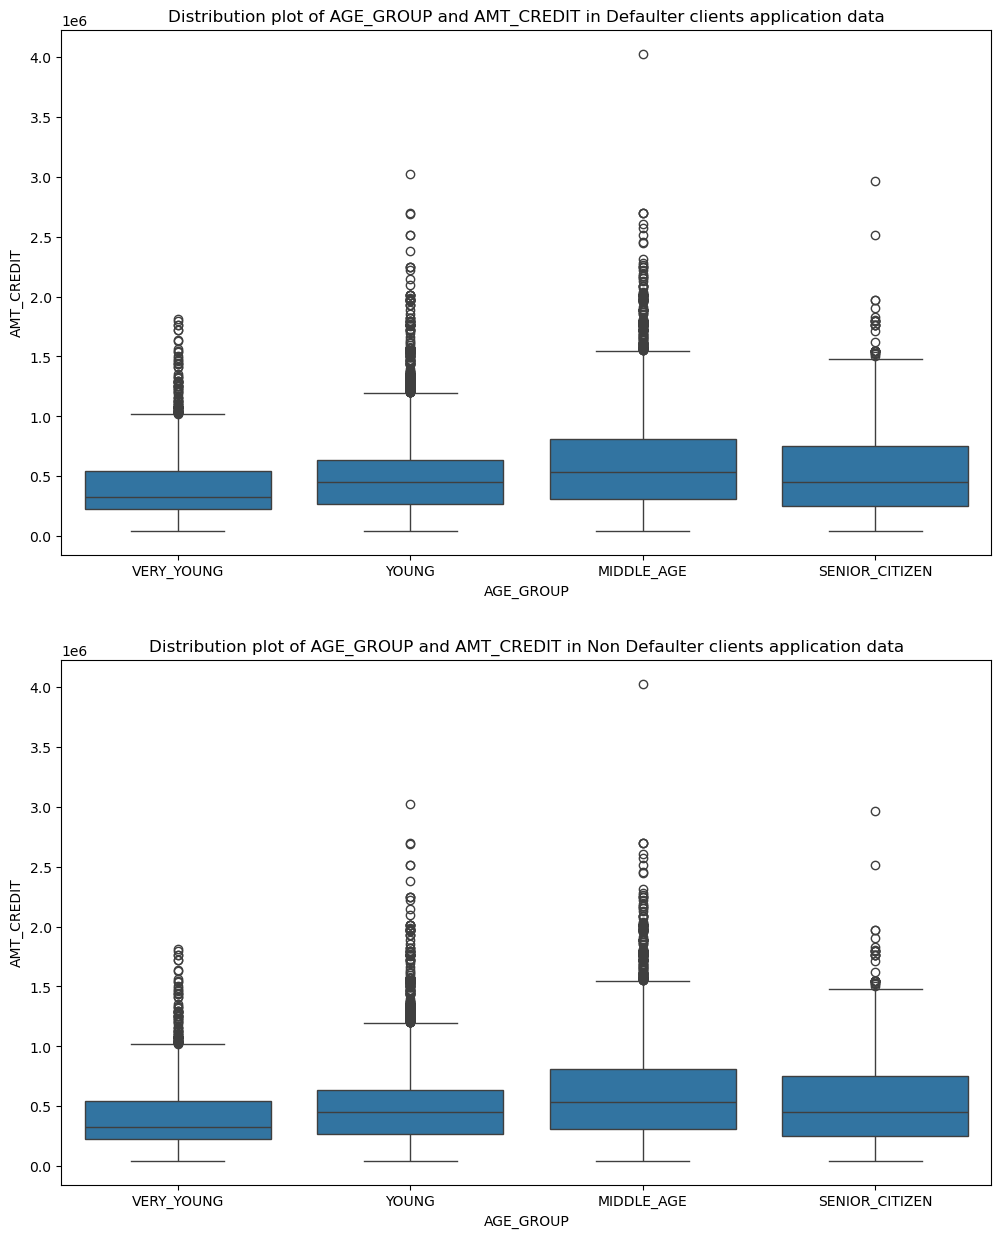

In [114]:
cat_num_biplot('AGE_GROUP','AMT_CREDIT')

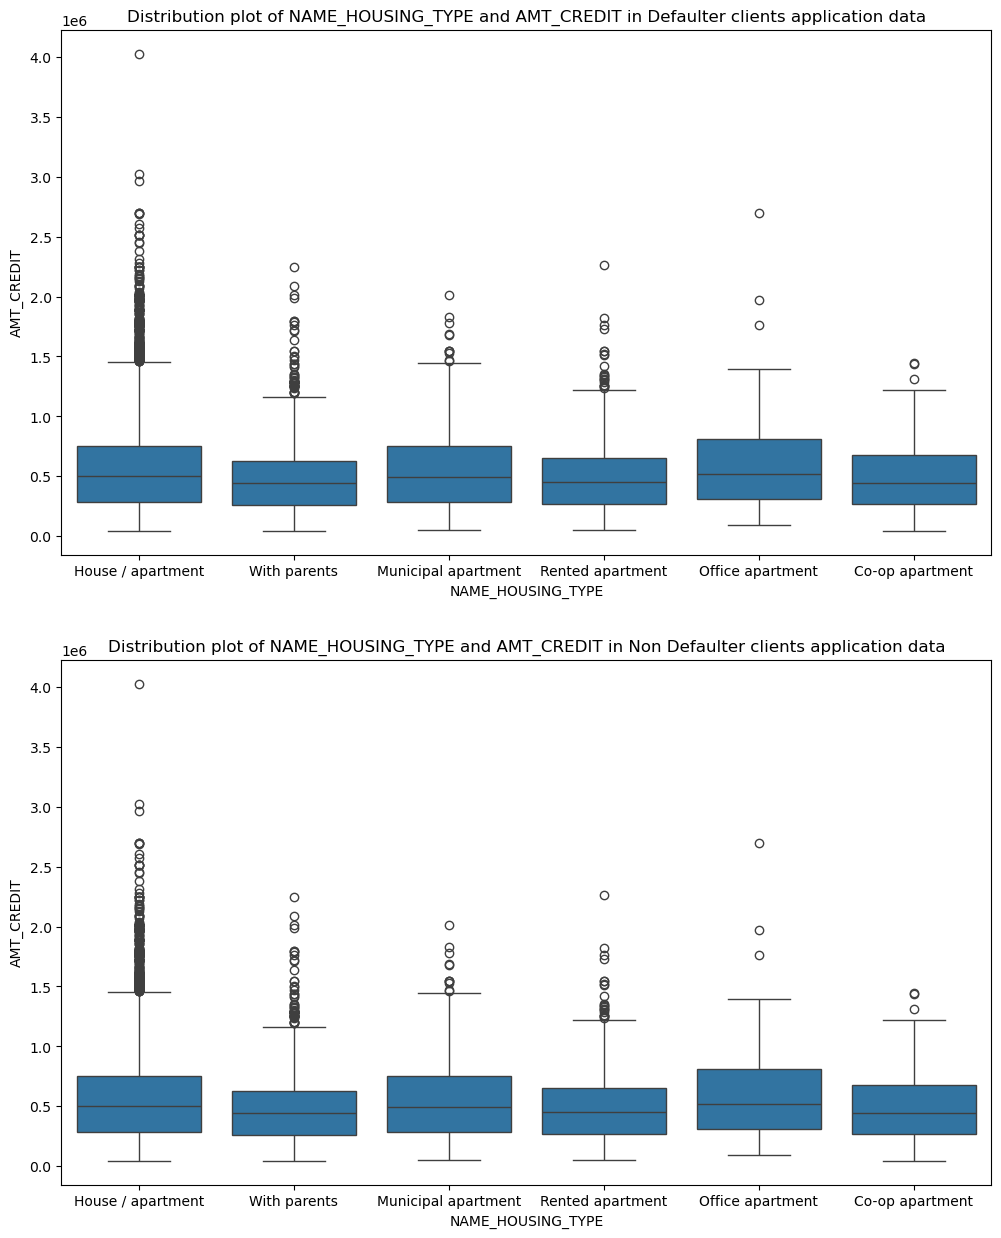

In [115]:
cat_num_biplot('NAME_HOUSING_TYPE','AMT_CREDIT')

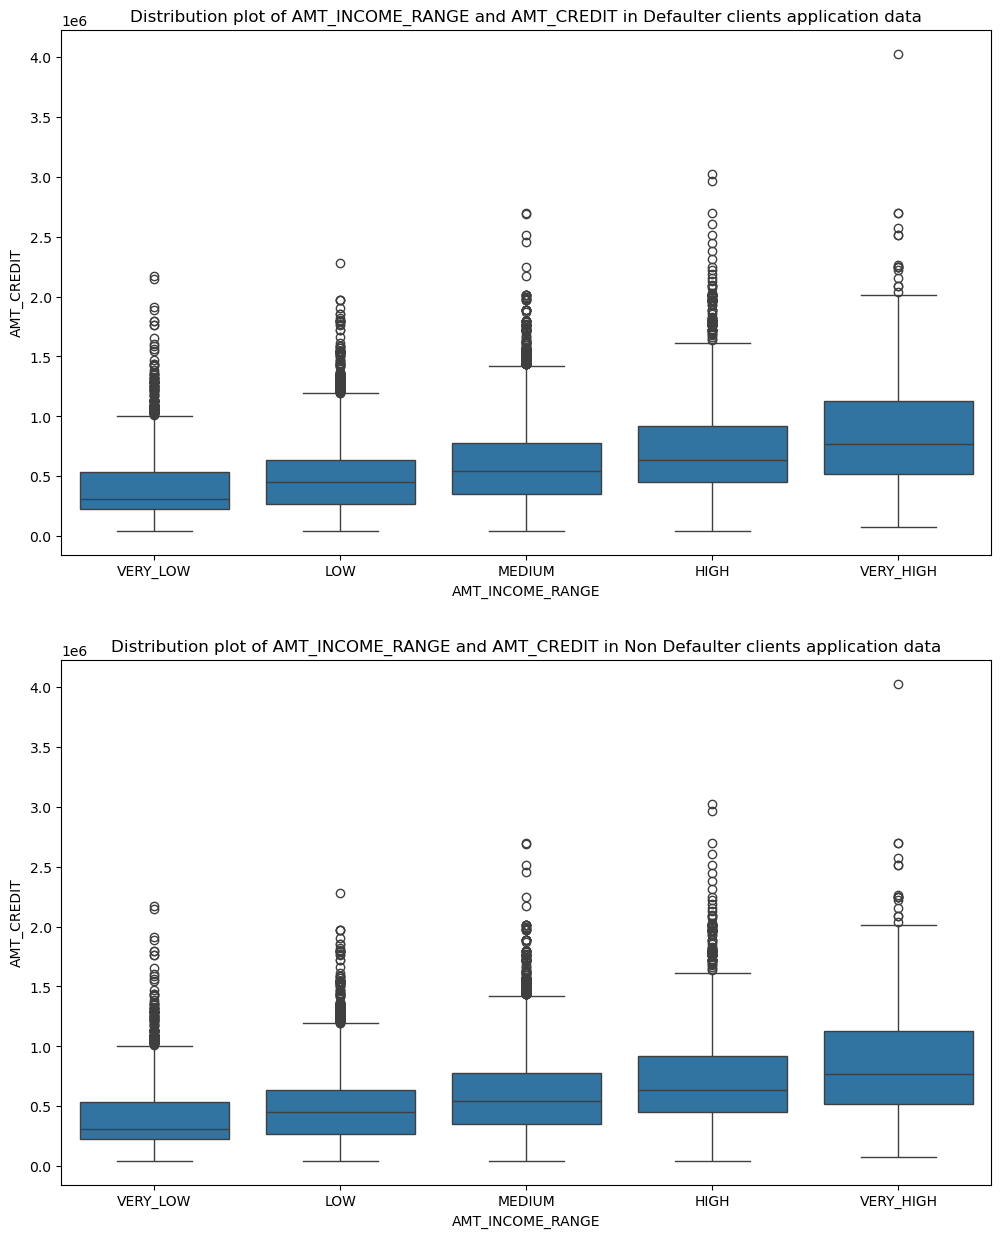

In [116]:
cat_num_biplot('AMT_INCOME_RANGE','AMT_CREDIT')

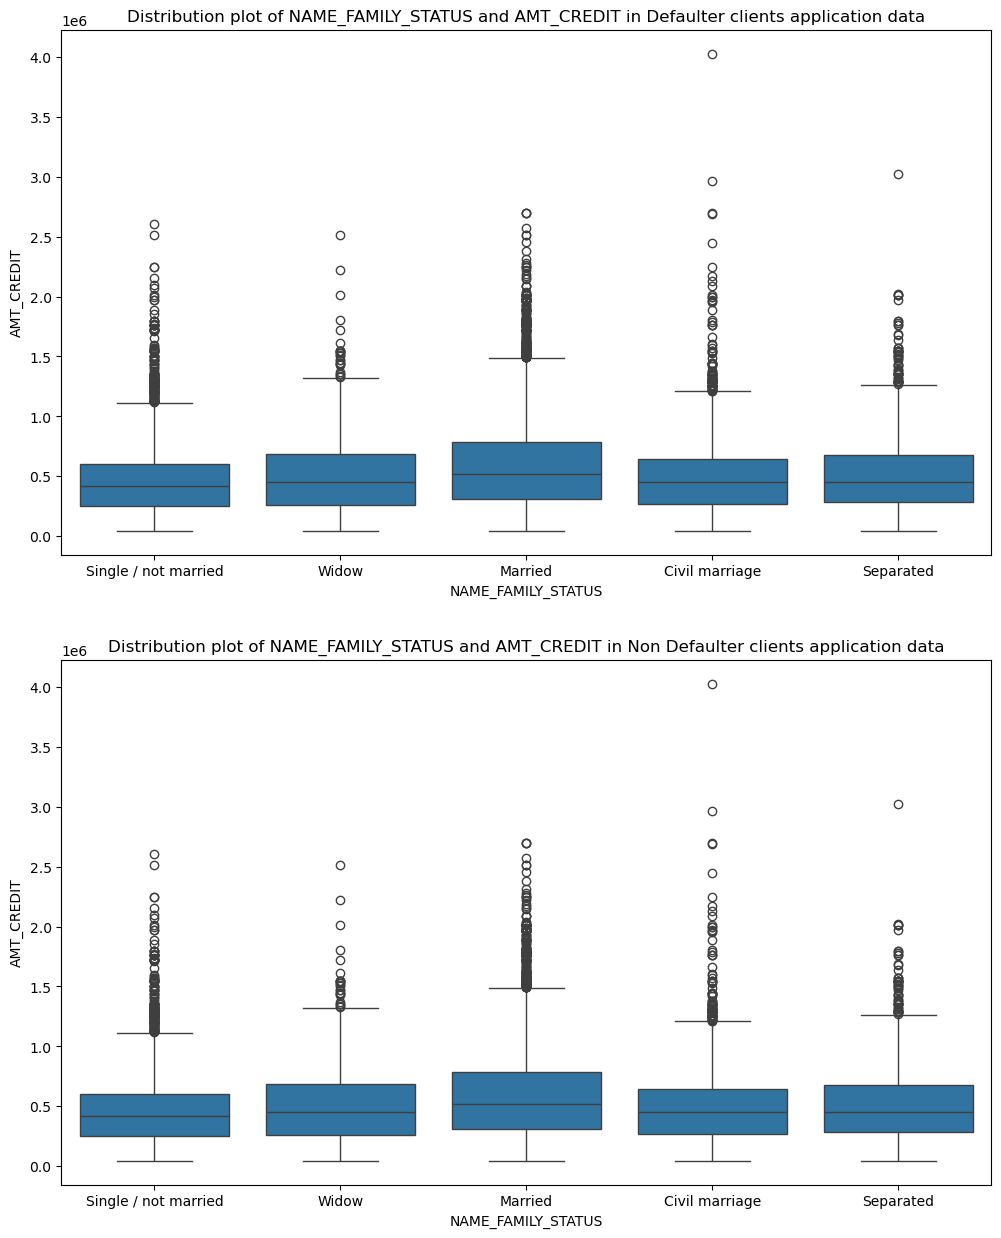

In [117]:
cat_num_biplot('NAME_FAMILY_STATUS','AMT_CREDIT')

#### Categoric Vs Categoric Bivariate Analysis

In [118]:
#Function for categoric vs categoric bivariate analysis on application data
#In application data creating two categories for defaulters and non defaulters 
def cat_cat_biplot(feature):
    plt.figure(figsize =(10,6))
    app.groupby(feature)['TARGET'].mean().plot.bar()
    plt.title(f'Distribution of Target vs {feature} in clients aplication data')
    plt.show()

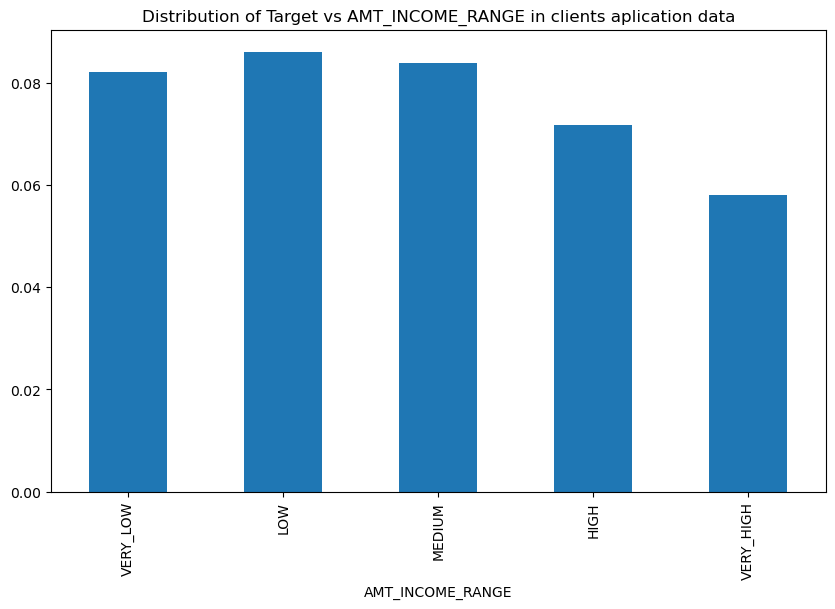

In [119]:
cat_cat_biplot('AMT_INCOME_RANGE')

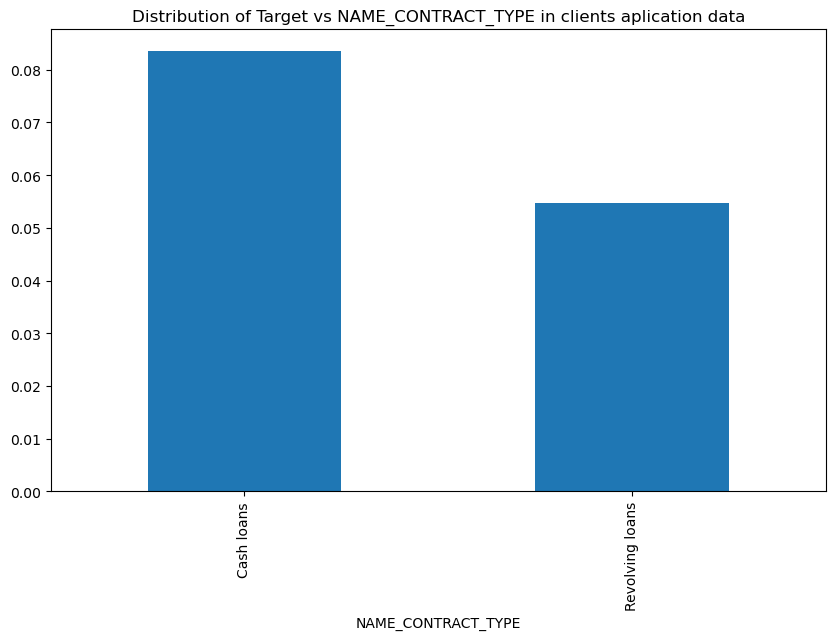

In [120]:
cat_cat_biplot('NAME_CONTRACT_TYPE')

More defaults for cash loans 

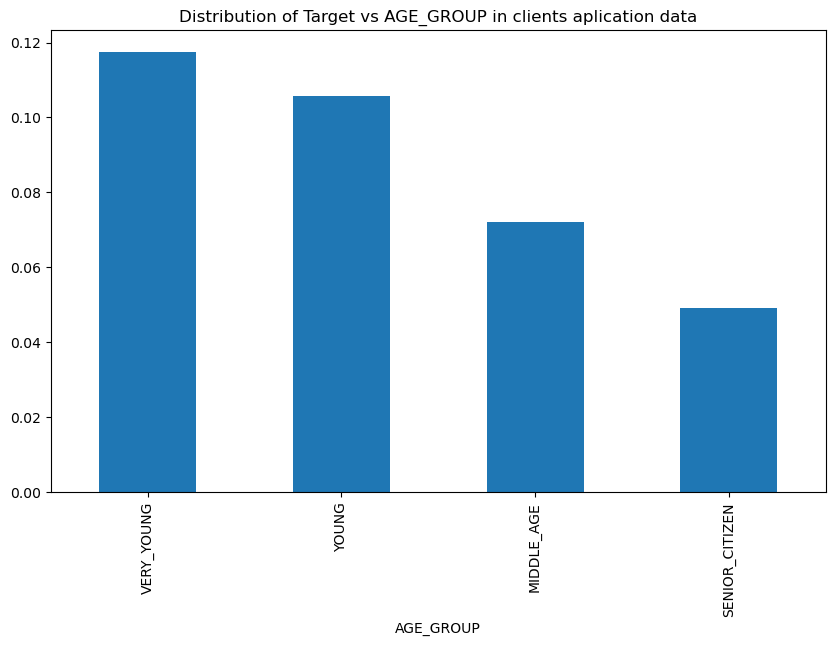

In [121]:
cat_cat_biplot('AGE_GROUP')

It can be infered  that very young and young people show more defaults 

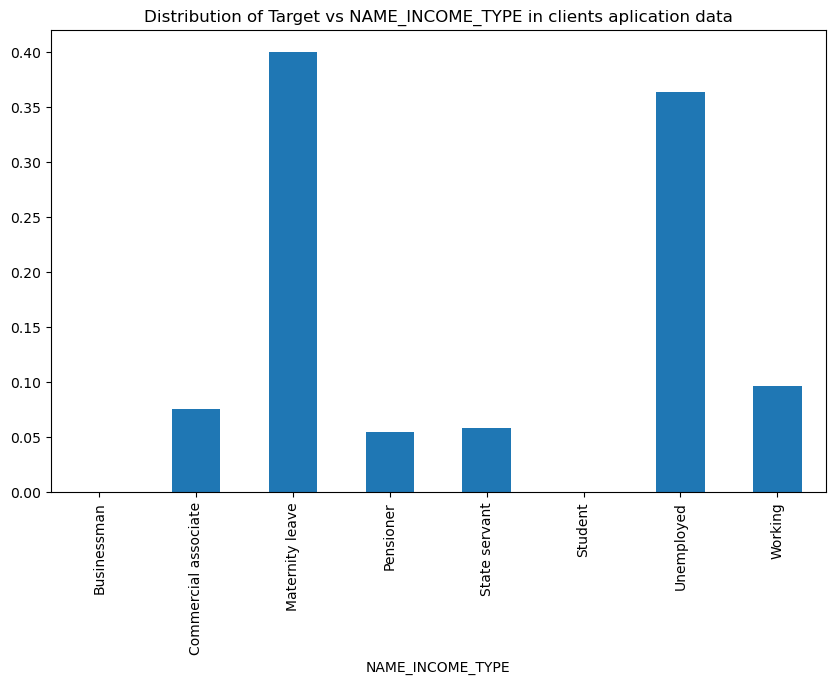

In [122]:
cat_cat_biplot('NAME_INCOME_TYPE')

Unemployed and matertinity leave income type shows maximum deaults

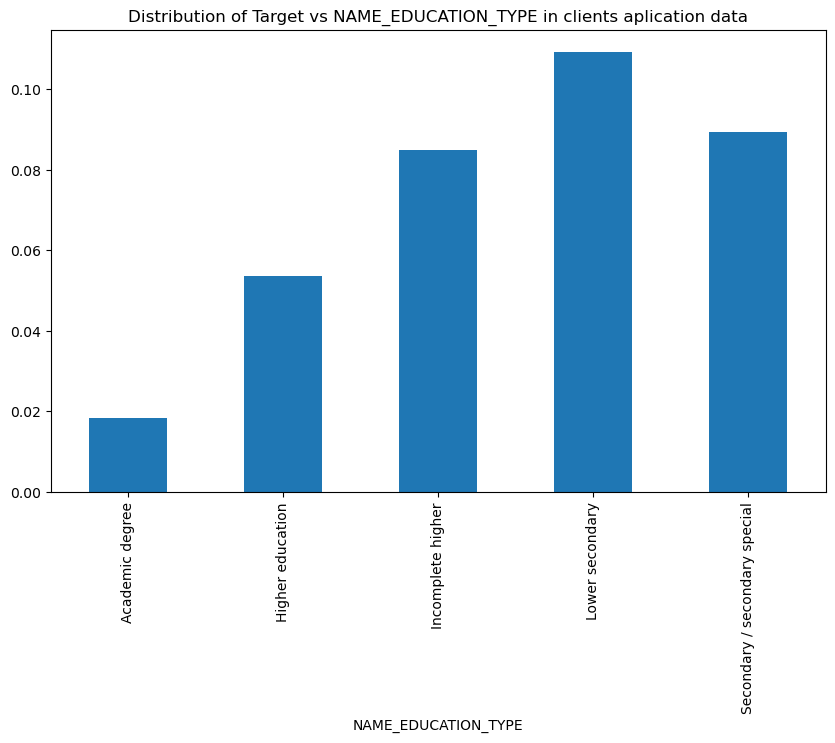

In [123]:
cat_cat_biplot('NAME_EDUCATION_TYPE')

Academic degree education types shows least defaults, the reason can be associated with least amount of loan applications 

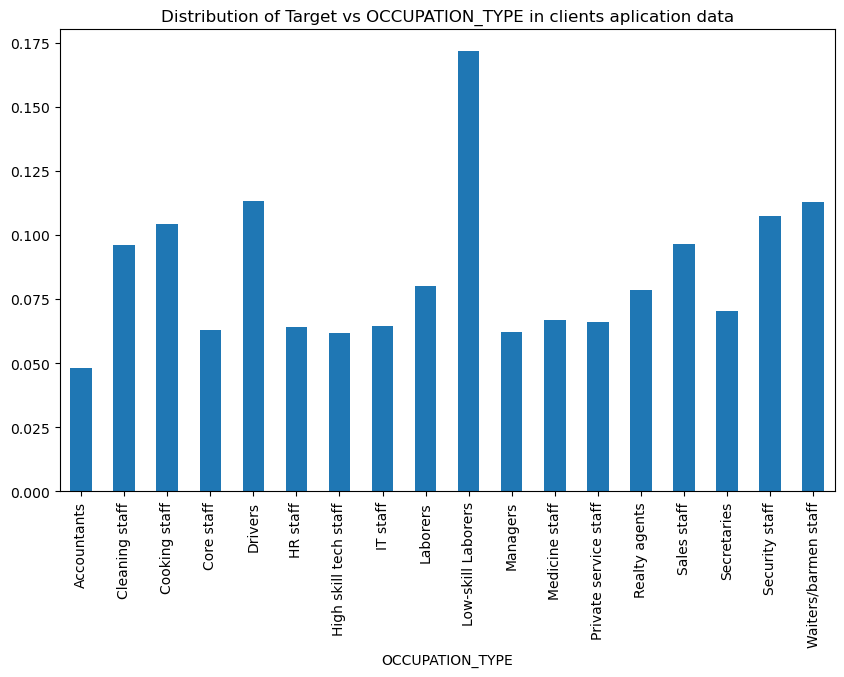

In [124]:
cat_cat_biplot('OCCUPATION_TYPE')

Low skill Laborers show higher defaults hence higher riskes associated

#### Multivariate Analysis

In [125]:
#Function to plot multivariate analysis
# A pivot table is created based on Target values and 2 categoric variables columns are provided
# A heat map is created based on that correlation 
def mult_plot(var1,var2):
    plt.figure(figsize = (12,6))
    res = pd.pivot_table(data = app, index = var1, columns = var2, values = 'TARGET')
    sns.heatmap(res,annot = True, cmap = 'RdYlGn')
    plt.show()

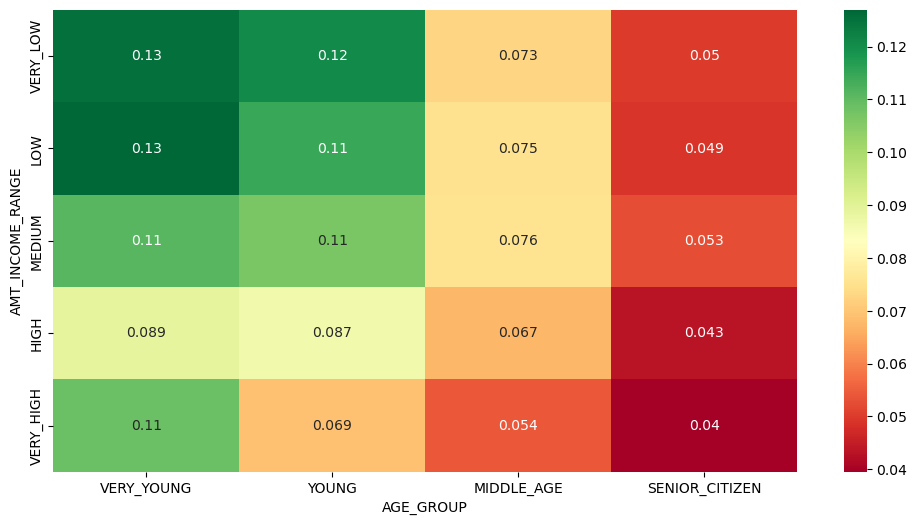

In [126]:
mult_plot('AMT_INCOME_RANGE','AGE_GROUP')

It can be inferred that clients in the very young age group with very low and low income range have higher chances of defaults.
Senior citizen with very high incomes are least likely to default 

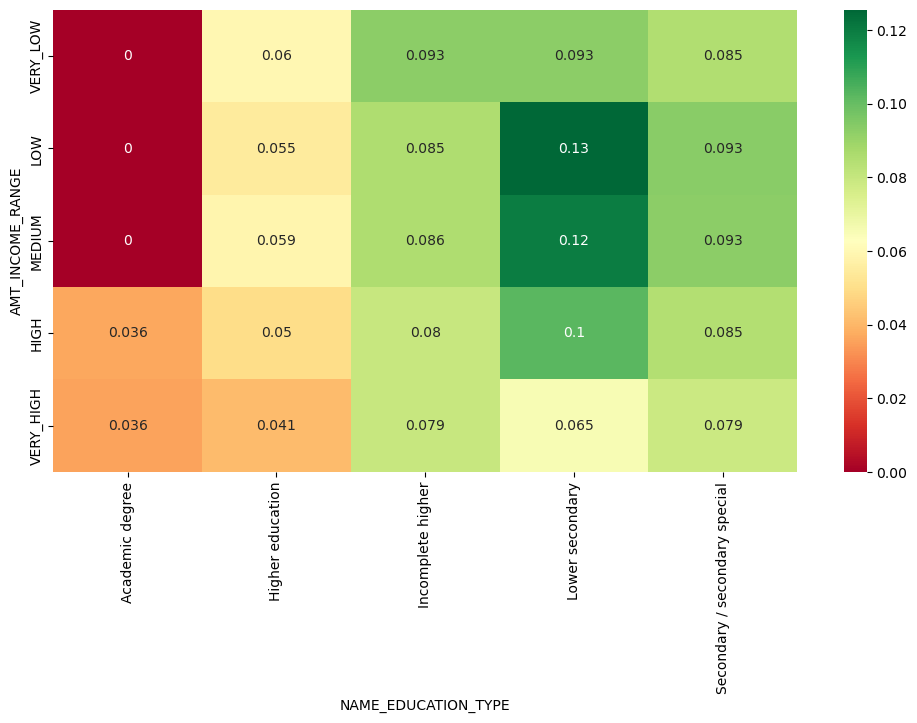

In [127]:
mult_plot('AMT_INCOME_RANGE','NAME_EDUCATION_TYPE')

It can be inferred that clients with lower secondary education and low income range are likely to default


### 4. Previous Application Data Analysis

#### 4.1 Examining the Dataset

In [128]:
prev_app.shape

(1670214, 37)

In [129]:
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [130]:
# Identifying the columns starting with string DAYS in previous application data
#Changing the values by using absolute function to positive values for days
days_cols = [i for i in prev_app if i.startswith('DAYS')]
prev_app[days_cols] = abs(prev_app[days_cols])

In [131]:
#Identifying the missing values percentage value in previous application data 
missing_val_prev_app_perc = round(100*(prev_app.isnull().sum()/len(prev_app.index)),2)

In [132]:
#Identifying the columns with null value percentage more than zero in previous application data 
missing_val_prev_app_perc[missing_val_prev_app_perc>0].sort_values(ascending = False)

RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
dtype: float64

In [133]:
# Identifying the distribution of contract status in percentage format
prev_app['NAME_CONTRACT_STATUS'].value_counts(normalize = True)*100

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64

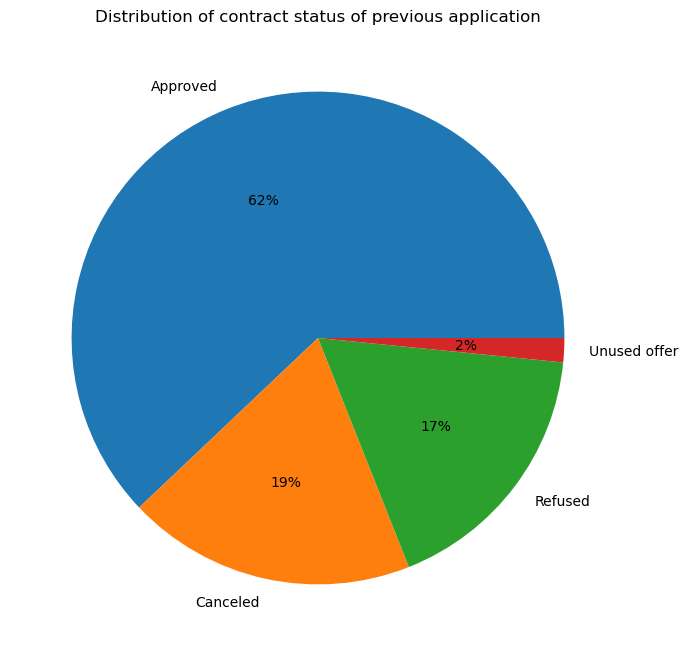

In [134]:
#plotting the distribution over a pie chart 
plt.figure(figsize = (8,8))
plt.pie(prev_app['NAME_CONTRACT_STATUS'].value_counts(normalize = True)*100,labels = ['Approved', 'Canceled', 'Refused', 'Unused offer'] , autopct = '%1.f%%')
plt.title('Distribution of contract status of previous application')
plt.show()

In [135]:
#Function to perform univariate analysis on previous application dataset and in that categorizing using contract status 
def uni_prev_app(var):
    fig = plt.figure(figsize = (12,6))
    plt.ylabel('Total count')
    plt.title(f'Distribution of {var} in clients previous application data')
    plt.xticks(rotation = 45)
    sns.countplot(x = var, data = prev_app, hue = 'NAME_CONTRACT_STATUS')
    plt.show()

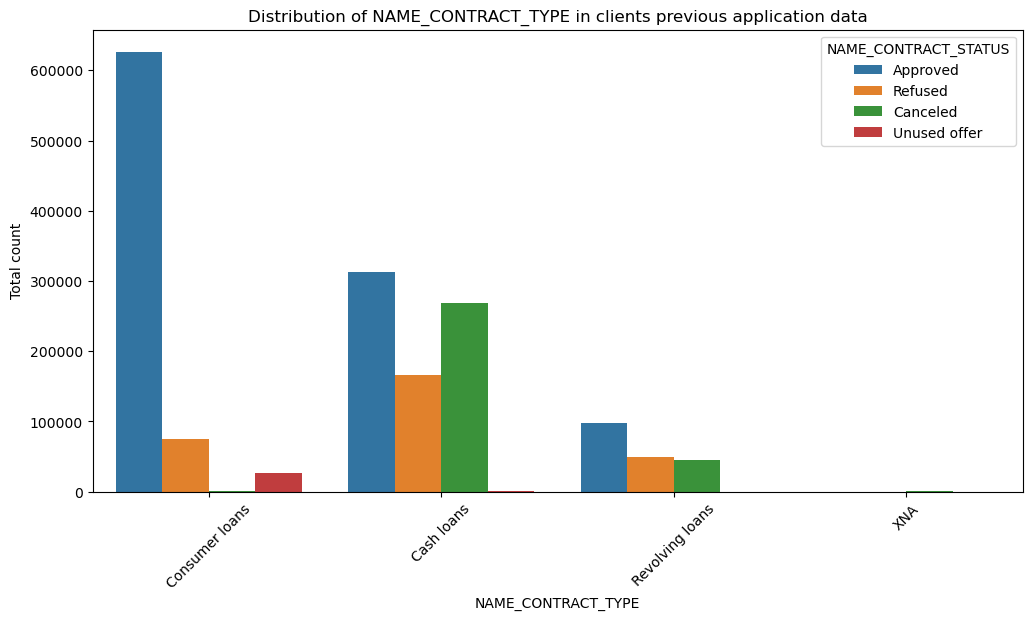

In [136]:
uni_prev_app('NAME_CONTRACT_TYPE')

Consumer loans have the highest approved status 

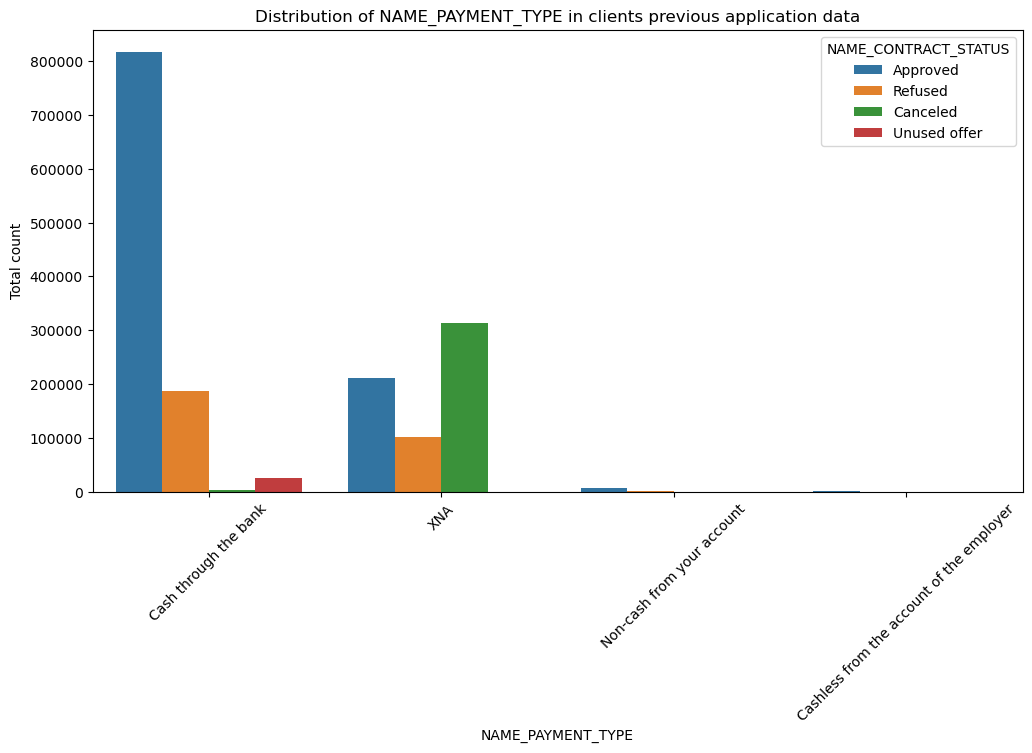

In [137]:
uni_prev_app('NAME_PAYMENT_TYPE')

clients from previous application data selecting Payment type of cash through the banks shows highest approval 

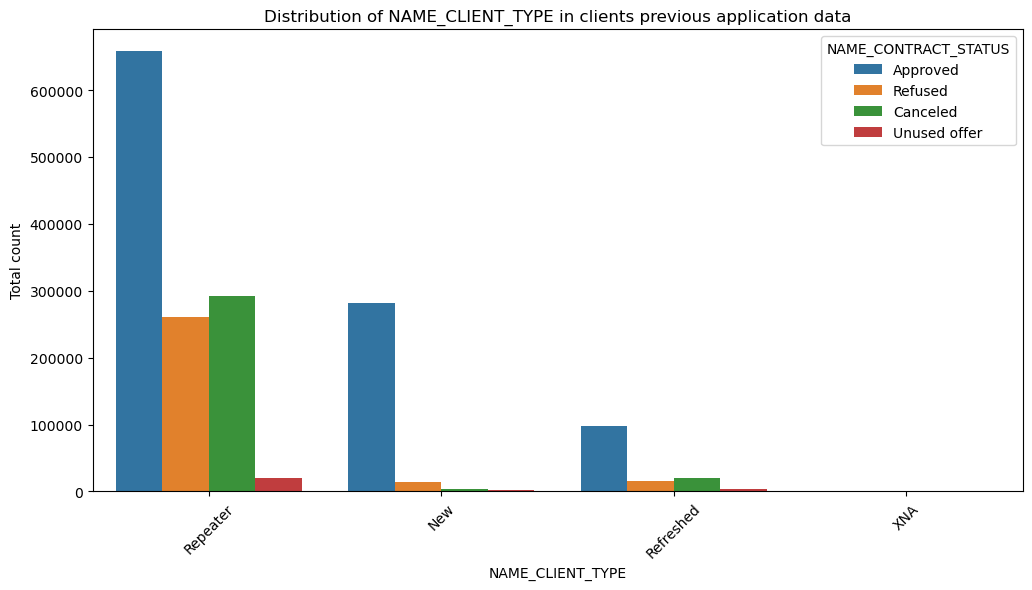

In [138]:
uni_prev_app('NAME_CLIENT_TYPE')

Old Clients applying have higher chances of loan approval

#### Bivariate Analysis on Previous Application 

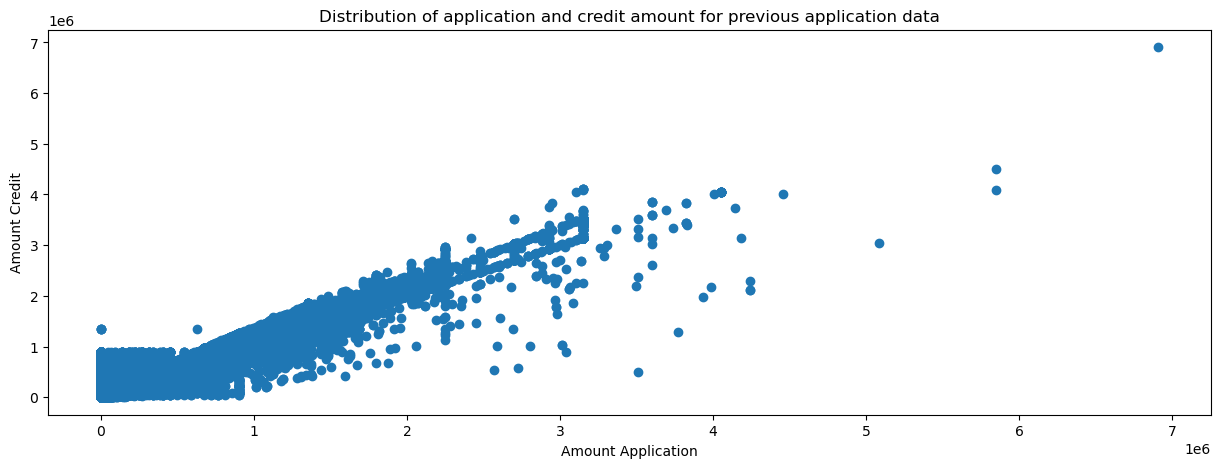

In [139]:
#Plotting the scatter plot for amount application and amount credit 
plt.figure(figsize = (15,5))
plt.scatter(x = prev_app.AMT_APPLICATION, y = prev_app.AMT_CREDIT)
plt.xlabel('Amount Application')
plt.ylabel('Amount Credit')
plt.title('Distribution of application and credit amount for previous application data')
plt.show()

There can be seen a moderate correlation between amount application and amount credit 

### 5. Merging the two data sets of application data and previous application data

In [140]:
#Merging the two dataframes application data and previous application data based on their ID   
merge_data = app.merge(prev_app,on = 'SK_ID_CURR', how = 'inner',)

In [141]:
merge_data.shape

(1413701, 114)

In [142]:
 merge_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 114 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_x          object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_x                  float64 
 9    AMT_ANNUITY_x                 float64 
 10   AMT_GOODS_PRICE_x             float64 
 11   NAME_TYPE_SUITE_x             object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH               

In [143]:
#Function to plot mergerd data on basis of different attributes to identify its impact on Contract Status
def plot_merge(var):
    new_data = pd.pivot_table(data = merge_data, values = 'SK_ID_CURR', index = var, columns = 'NAME_CONTRACT_STATUS', aggfunc = 'count' )
    new_data.plot(kind="bar", figsize=[10,6])
    plt.show()

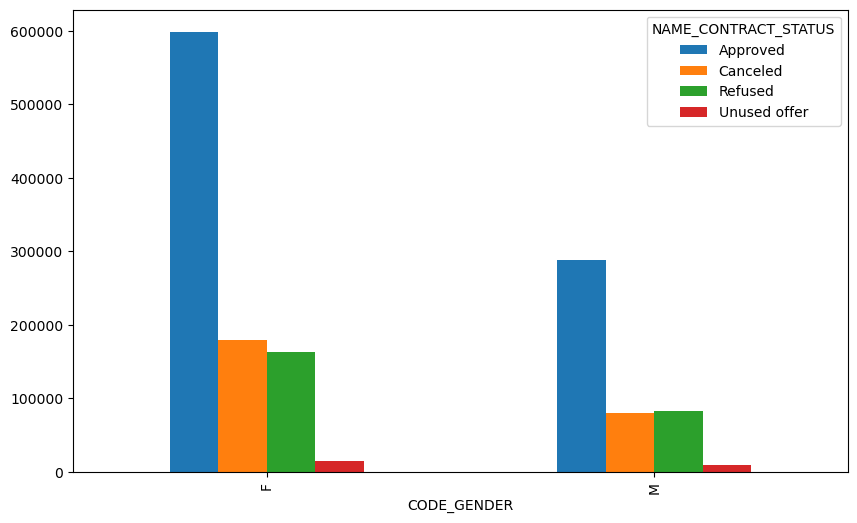

In [144]:
plot_merge('CODE_GENDER')

It can be inferred that female clients applications have higher approval rates for loans and the reasons associated can be less defaulters than males and higher number of applications

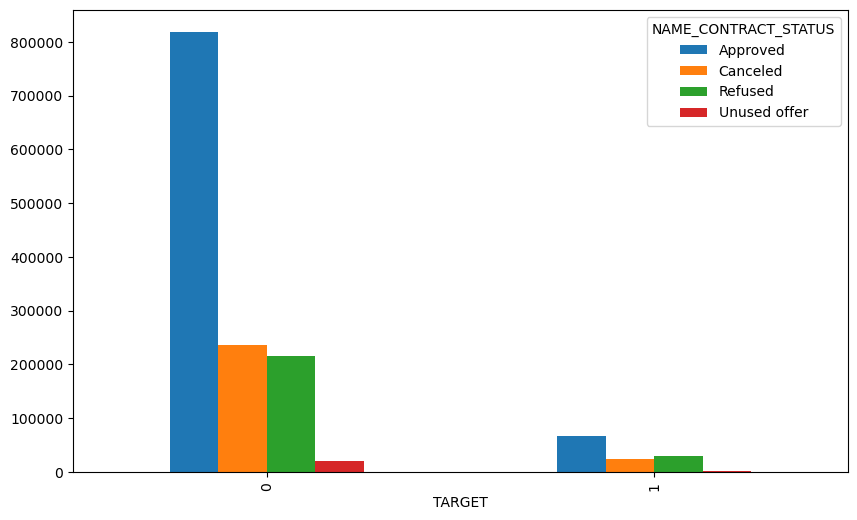

In [145]:
plot_merge('TARGET')

It can be inferreed that clients with previous approved application status have lower defaulter rates 

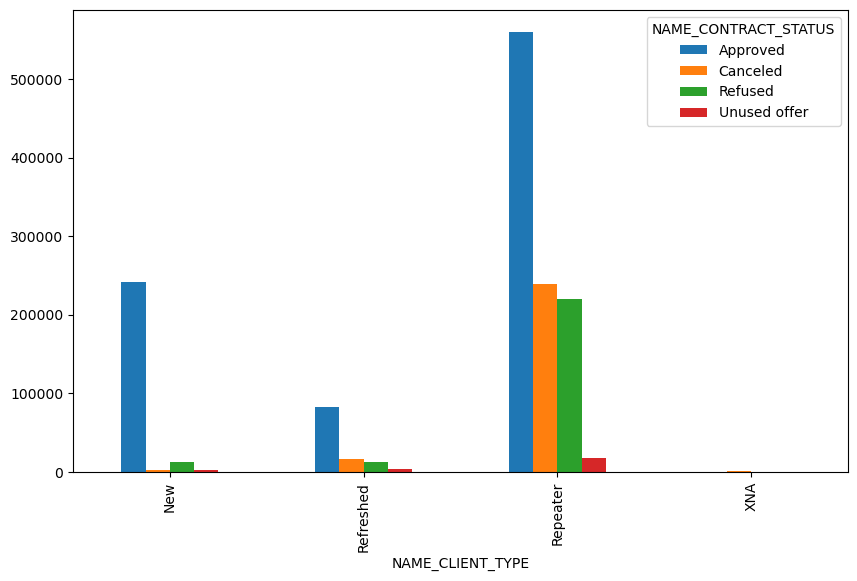

In [146]:
plot_merge('NAME_CLIENT_TYPE')

It can be inferred that clients old clients have higher approval rates  

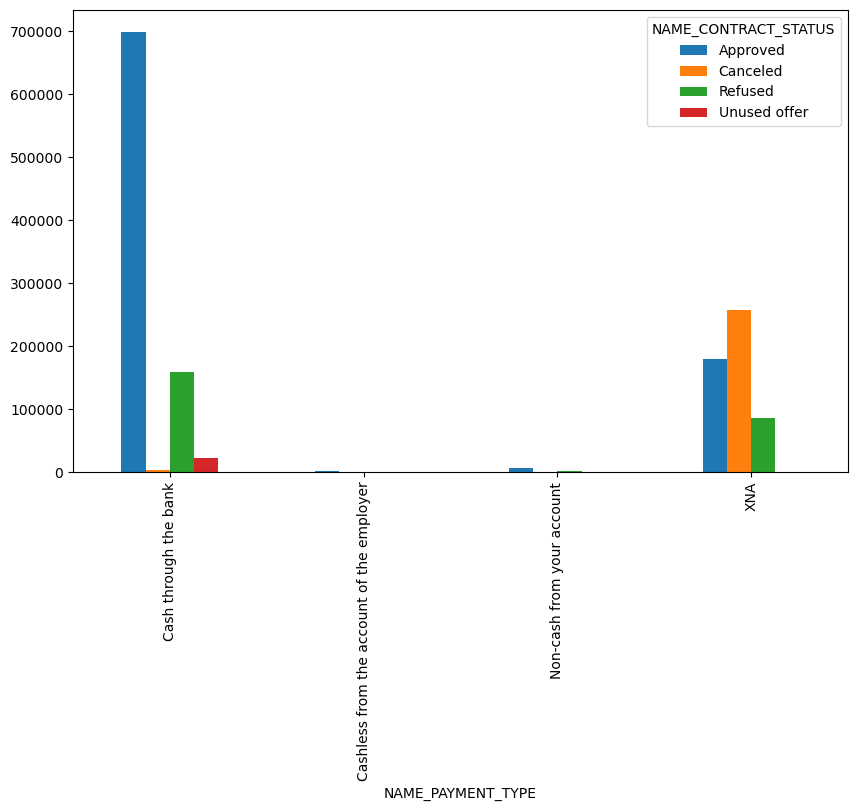

In [147]:
plot_merge('NAME_PAYMENT_TYPE')

It can be inferred that clients with payment type cash through the bank have higher approval rates 